In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


So my first thought is to look up dataset and see what all is going there

In [2]:
import os
os.listdir()


['main.ipynb',
 '.DS_Store',
 'uv.lock',
 'eda_top_correlations.csv',
 'pyproject.toml',
 'eda_missingness.csv',
 'README.md',
 '.gitignore',
 'all_variables.json',
 '.venv',
 '.python-version',
 '.ipynb_checkpoints',
 'lectures',
 '.git',
 '.vscode',
 'data',
 'outputs',
 'test.ipynb']

In [3]:
import os
os.listdir("data/raw")


['health_insurance.XPT',
 'smoking_cigarette_use.XPT',
 'diabetes.XPT',
 'preventive_aspirin_use.XPT',
 'immunization.XPT',
 'audiometry.XPT',
 'current_health_status.XPT',
 'blood_pressure_cholesterol.XPT',
 'prescription_medications.XPT',
 'medical_conditions.XPT',
 'alcohol_use.XPT',
 'pesticide_use.XPT',
 'early_childhood.XPT',
 'smoking_recent_tobacco_use.XPT',
 'oral_health.XPT',
 'dermatology.XPT',
 'weight_history.XPT',
 'kidney_condition_urology.XPT',
 'diet_behavior_nutrition.XPT',
 'functioning.XPT',
 'physical_activity.XPT',
 'hospital_utilization_access_to_care.XPT',
 'sleep_disorders.XPT',
 'physical_activity_youth.XPT',
 'occupation.XPT',
 'hepatitis.XPT',
 'housing_characteristics.XPT',
 'mental_health_depression_screener.XPT',
 'income.XPT',
 'smoking_household_smokers.XPT',
 'acculturation.XPT']

In [4]:
os.listdir("data/extra")


['variables.csv']

So here i see i have to map variables and it looks a tough job. What i thought is that we can probably combine them togehter and generate csv to analyse easily.

In [5]:
import pandas as pd
vars_df = pd.read_csv("data/extra/variables.csv")
vars_df.head()


,Variable Name,Variable Description,Renamed_variables,Data File Name,Data File Description,Begin Year,EndYear,Component,Use Constraints,Unnamed: 9
0,AUQ054,These next questions are about {your/SP's} hea...,HearingStatus_NoAid,AUQ_L,Audiometry,2021,2023,Questionnaire,NaN,NaN
1,AUQ101,How often {do you/does SP} have difficulty hea...,DifficultyHearing_WithBackgroundNoise,AUQ_L,Audiometry,2021,2023,Questionnaire,NaN,NaN
2,AUQ144,A hearing test by a specialist is one that is ...,LastHearingTest_Specialist,AUQ_L,Audiometry,2021,2023,Questionnaire,NaN,NaN
3,AUQ410A,What are the main causes of {your/SP's} hearin...,reason_hearing_loss_A,AUQ_L,Audiometry,2021,2023,Questionnaire,NaN,NaN
4,AUQ410B,What are the main causes of {your/SP's} hearin...,reason_hearing_loss_B,AUQ_L,Audiometry,2021,2023,Questionnaire,NaN,NaN


In [6]:
df = pd.read_sas("data/raw/audiometry.XPT")
df.head()
df.columns[:20]


Index(['SEQN', 'AUQ054', 'AUQ410A', 'AUQ410B', 'AUQ410C', 'AUQ410D', 'AUQ410E',
       'AUQ410F', 'AUQ410G', 'AUQ410H', 'AUQ410I', 'AUQ410J', 'AUQ144',
       'AUQ101'],
      dtype='object')

In [7]:
import pandas as pd
import os
from pathlib import Path

raw_path = Path("data/raw")
output_path = Path("data/csv_clean")
output_path.mkdir(exist_ok=True)

# Load variable metadata
vars_df = pd.read_csv("data/extra/variables.csv")

# Build mapping: Variable Name -> Renamed_variables
rename_map = dict(zip(vars_df["Variable Name"], vars_df["Renamed_variables"]))

# Process each XPT file
for xpt_file in raw_path.glob("*.XPT"):
    module_name = xpt_file.stem
    print(f"Processing: {module_name}")

    # Load XPT
    df = pd.read_sas(xpt_file)

    # Rename columns using rename_map (where available)
    new_columns = []
    for col in df.columns:
        if col in rename_map and isinstance(rename_map[col], str):
            new_columns.append(rename_map[col])
        else:
            new_columns.append(col)  # keep original if no rename available

    df.columns = new_columns

    # Save CSV
    df.to_csv(output_path / f"{module_name}.csv", index=False)
    print(f"Saved → {module_name}.csv")


Processing: health_insurance
Saved → health_insurance.csv
Processing: smoking_cigarette_use
Saved → smoking_cigarette_use.csv
Processing: diabetes
Saved → diabetes.csv
Processing: preventive_aspirin_use
Saved → preventive_aspirin_use.csv
Processing: immunization
Saved → immunization.csv
Processing: audiometry
Saved → audiometry.csv
Processing: current_health_status
Saved → current_health_status.csv
Processing: blood_pressure_cholesterol
Saved → blood_pressure_cholesterol.csv
Processing: prescription_medications
Saved → prescription_medications.csv
Processing: medical_conditions
Saved → medical_conditions.csv
Processing: alcohol_use
Saved → alcohol_use.csv
Processing: pesticide_use
Saved → pesticide_use.csv
Processing: early_childhood
Saved → early_childhood.csv
Processing: smoking_recent_tobacco_use
Saved → smoking_recent_tobacco_use.csv
Processing: oral_health
Saved → oral_health.csv
Processing: dermatology
Saved → dermatology.csv
Processing: weight_history
Saved → weight_history.csv


In [8]:
diabetes = pd.read_csv("data/csv_clean/diabetes.csv")
diabetes.head()


,sequence_no,EverTold_Diabetes,Age_DiabetesDiagnosis,EverTold_Prediabetes,BloodSugarTest_Last3Years,CurrentlyTaking_Insulin,InsulinDuration,DIQ060U,CurrentlyTaking_DiabeticPills
0,130378.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN
1,130379.0,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN
2,130380.0,1.0,35.0,NaN,NaN,2.0,NaN,NaN,1.0
3,130381.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for col in diabetes.columns:
    print("----", col, "----")
    print(diabetes[col].unique()[:10])   # show first 10 unique values
    print()


---- sequence_no ----
[130378. 130379. 130380. 130381. 130382. 130383. 130384. 130385. 130386.
 130387.]

---- EverTold_Diabetes ----
[ 2.  1.  3. nan  9.]

---- Age_DiabetesDiagnosis ----
[ nan  35.  55. 999.  33.  66.  51.  57.  56.  45.]

---- EverTold_Prediabetes ----
[ 2. nan  1.  9.]

---- BloodSugarTest_Last3Years ----
[ 2.  1. nan  9.  7.]

---- CurrentlyTaking_Insulin ----
[nan  2.  1.]

---- InsulinDuration ----
[ nan   3.   7.   5.  15.   2.  10.   6.  20. 999.]

---- DIQ060U ----
[nan  2.  1.]

---- CurrentlyTaking_DiabeticPills ----
[nan  1.  2.  9.]



In [10]:
import pandas as pd

acc = pd.read_csv("data/csv_clean/acculturation.csv")
acc.head()


,sequence_no,LanguageSpokenAtHome_1,LanguageSpokenAtHome_2,LanguageSpokenAtHome_3,RatioEnglishSpanishAtHome
0,130378.0,1.0,NaN,9.0,NaN
1,130379.0,1.0,NaN,NaN,NaN
2,130380.0,NaN,NaN,NaN,2.0
3,130381.0,1.0,NaN,NaN,NaN
4,130383.0,NaN,NaN,NaN,3.0


In [11]:
import pandas as pd

di = pd.read_csv("data/csv_clean/diabetes.csv")
acc = pd.read_csv("data/csv_clean/acculturation.csv")

# fix SEQN name if needed
if "sequence_no" in di.columns:
    di = di.rename(columns={"sequence_no":"SEQN"})
if "sequence_no" in acc.columns:
    acc = acc.rename(columns={"sequence_no":"SEQN"})

# merge
merged = acc.merge(di[["SEQN","EverTold_Diabetes"]], on="SEQN", how="left")


In [12]:
corr = merged.corr(numeric_only=True)["EverTold_Diabetes"].sort_values(ascending=False)
corr


EverTold_Diabetes            1.000000
RatioEnglishSpanishAtHome    0.051774
SEQN                         0.005492
LanguageSpokenAtHome_1       0.002930
LanguageSpokenAtHome_2            NaN
LanguageSpokenAtHome_3            NaN
Name: EverTold_Diabetes, dtype: float64

In [13]:
import pandas as pd

di = pd.read_csv("data/csv_clean/diabetes.csv")
al = pd.read_csv("data/csv_clean/alcohol_use.csv")

# fix SEQN name if needed
if "sequence_no" in di.columns:
    di = di.rename(columns={"sequence_no":"SEQN"})
if "sequence_no" in al.columns:
    al = al.rename(columns={"sequence_no":"SEQN"})

merged = al.merge(di[["SEQN","EverTold_Diabetes"]], on="SEQN", how="left")

corr = merged.corr(numeric_only=True)["EverTold_Diabetes"].sort_values(ascending=False)
corr


EverTold_Diabetes                                1.000000
DailyHeavyDrinkingHistory                        0.023428
OccasionsWithHeavyDrinking_30Days                0.015831
AlcoholConsumptionFrequency_12Months             0.008998
SEQN                                             0.002164
MoreThanSpecificNumberOfDrinksFrequency         -0.022500
AverageDrinksPerDrinkingDay_12Months            -0.031744
HeavyDrinkingWithinTwoHoursFrequency_12Months   -0.038670
EverHad_Alcohol                                 -0.050502
MoreThan8DrinksPerDay_12Months                  -0.068621
Name: EverTold_Diabetes, dtype: float64

In [14]:
import pandas as pd

# load diabetes + the next csv
di = pd.read_csv("data/csv_clean/diabetes.csv")
ad = pd.read_csv("data/csv_clean/audiometry.csv")

# fix SEQN name if needed
if "sequence_no" in di.columns:
    di = di.rename(columns={"sequence_no":"SEQN"})
if "sequence_no" in ad.columns:
    ad = ad.rename(columns={"sequence_no":"SEQN"})

# merge on SEQN
merged = ad.merge(di[["SEQN","EverTold_Diabetes"]], on="SEQN", how="left")

# compute correlations
corr = merged.corr(numeric_only=True)["EverTold_Diabetes"].sort_values(ascending=False)
corr


EverTold_Diabetes                        1.000000
DifficultyHearing_WithBackgroundNoise    0.069672
LastHearingTest_Specialist               0.014425
reason_hearing_loss_A                    0.007944
SEQN                                     0.005236
HearingStatus_NoAid                     -0.063321
reason_hearing_loss_B                         NaN
reason_hearing_loss_C                         NaN
reason_hearing_loss_D                         NaN
reason_hearing_loss_E                         NaN
reason_hearing_loss_F                         NaN
reason_hearing_loss_G                         NaN
reason_hearing_loss_H                         NaN
reason_hearing_loss_I                         NaN
reason_hearing_loss_J                         NaN
Name: EverTold_Diabetes, dtype: float64

In [15]:
import pandas as pd

# load diabetes + the next csv
di = pd.read_csv("data/csv_clean/diabetes.csv")
bp = pd.read_csv("data/csv_clean/blood_pressure_cholesterol.csv")

# fix SEQN name if needed
if "sequence_no" in di.columns:
    di = di.rename(columns={"sequence_no":"SEQN"})
if "sequence_no" in bp.columns:
    bp = bp.rename(columns={"sequence_no":"SEQN"})

# merge on SEQN
merged = bp.merge(di[["SEQN","EverTold_Diabetes"]], on="SEQN", how="left")

# compute correlations
corr = merged.corr(numeric_only=True)["EverTold_Diabetes"].sort_values(ascending=False)
corr


EverTold_Diabetes                          1.000000
EverTold_Hypertension                      0.172048
CurrentlyTaking_CholesterolMedication      0.153753
EverTold_HighCholesterol                   0.116205
CurrentlyTaking_BloodPressureMedication    0.099875
ConfirmedHypertension_Visits               0.018991
SEQN                                       0.006795
Name: EverTold_Diabetes, dtype: float64

In [16]:
import pandas as pd

# load diabetes + next csv
di = pd.read_csv("data/csv_clean/diabetes.csv")
chs = pd.read_csv("data/csv_clean/current_health_status.csv")

# fix SEQN
if "sequence_no" in di.columns:
    di = di.rename(columns={"sequence_no":"SEQN"})
if "sequence_no" in chs.columns:
    chs = chs.rename(columns={"sequence_no":"SEQN"})

# merge
merged = chs.merge(di[["SEQN","EverTold_Diabetes"]], on="SEQN", how="left")

# correlation
corr = merged.corr(numeric_only=True)["EverTold_Diabetes"].sort_values(ascending=False)
corr


EverTold_Diabetes     1.000000
SEQN                  0.002064
EverTestedFor_AIDS   -0.005828
Name: EverTold_Diabetes, dtype: float64

In [17]:
import pandas as pd

# load diabetes + next csv
di = pd.read_csv("data/csv_clean/diabetes.csv")
derm = pd.read_csv("data/csv_clean/dermatology.csv")

# fix SEQN
if "sequence_no" in di.columns:
    di = di.rename(columns={"sequence_no":"SEQN"})
if "sequence_no" in derm.columns:
    derm = derm.rename(columns={"sequence_no":"SEQN"})

# merge
merged = derm.merge(di[["SEQN","EverTold_Diabetes"]], on="SEQN", how="left")

# correlation
corr = merged.corr(numeric_only=True)["EverTold_Diabetes"].sort_values(ascending=False)
corr


EverTold_Diabetes            1.000000
ShadeStayingFrequency        0.018940
SEQN                         0.012485
WearsLongSleevesFrequency   -0.025677
UsesSunscreenFrequency      -0.084184
Name: EverTold_Diabetes, dtype: float64

In [18]:
import pandas as pd

# load diabetes + next csv
di = pd.read_csv("data/csv_clean/diabetes.csv")
diet = pd.read_csv("data/csv_clean/diet_behavior_nutrition.csv")

# fix SEQN
if "sequence_no" in di.columns:
    di = di.rename(columns={"sequence_no":"SEQN"})
if "sequence_no" in diet.columns:
    diet = diet.rename(columns={"sequence_no":"SEQN"})

# merge
merged = diet.merge(di[["SEQN","EverTold_Diabetes"]], on="SEQN", how="left")

# correlation
corr = merged.corr(numeric_only=True)["EverTold_Diabetes"].sort_values(ascending=False)
corr


EverTold_Diabetes                             1.000000
BreakfastCostStatus                           0.037421
EverBreastfed                                 0.032214
AttendedCommunityMeals_Past12Months           0.032142
MealsDeliveredHome_Past12Months               0.020659
FoodShoppingResponsibility                    0.017105
FoodShoppingSharing                           0.009164
MealPlanningResponsibility                    0.006658
SEQN                                          0.005236
SchoolServesBreakfastsAtConstantCostsDaily    0.004058
CurrentlyAttendingSchool                      0.002086
SchoolServesLunches                           0.000284
MealPreparationSharing                       -0.001233
NumberWeeklyCompleteSchoolLunches            -0.002868
AgeFirstFedMilk                              -0.002889
NumberWeeklyCompleteSchoolBreakfasts         -0.002980
AgeFirstFedFormula                           -0.003902
AgeFirstFedOtherThanBreastMilk_inDays        -0.004291
AgeStopped

In [19]:
import pandas as pd

# load diabetes + next csv
di = pd.read_csv("data/csv_clean/diabetes.csv")
ec = pd.read_csv("data/csv_clean/early_childhood.csv")

# fix SEQN
if "sequence_no" in di.columns:
    di = di.rename(columns={"sequence_no":"SEQN"})
if "sequence_no" in ec.columns:
    ec = ec.rename(columns={"sequence_no":"SEQN"})

# merge
merged = ec.merge(di[["SEQN","EverTold_Diabetes"]], on="SEQN", how="left")

# correlation
corr = merged.corr(numeric_only=True)["EverTold_Diabetes"].sort_values(ascending=False)
corr


EverTold_Diabetes      1.000000
BirthWeight_2          0.047871
BirthWeight_1          0.047837
SEQN                   0.006672
Weight_2              -0.019793
Weight_1              -0.038506
OverweightDiagnosis   -0.046953
WeightAssessment      -0.053490
Name: EverTold_Diabetes, dtype: float64

In [20]:
import pandas as pd

# load diabetes + next csv
di = pd.read_csv("data/csv_clean/diabetes.csv")
func = pd.read_csv("data/csv_clean/functioning.csv")

# fix SEQN
if "sequence_no" in di.columns:
    di = di.rename(columns={"sequence_no":"SEQN"})
if "sequence_no" in func.columns:
    func = func.rename(columns={"sequence_no":"SEQN"})

# merge
merged = func.merge(di[["SEQN","EverTold_Diabetes"]], on="SEQN", how="left")

# correlation
corr = merged.corr(numeric_only=True)["EverTold_Diabetes"].sort_values(ascending=False)
corr


EverTold_Diabetes                                     1.000000
DifficultyHearing_Level                               0.315584
AdultDisabilityIndicator                              0.137649
AdultEnhancedDisabilityIndicator                      0.132988
DifficultySeeing_Level                                0.068518
DifficultyWithSelfCare_Level                          0.066829
DifficultyAcceptingRoutineChanges_Level               0.058691
DifficultyRememberingComparedToPeers_Level            0.043757
DifficultyBeingUnderstoodAtHome_Level                 0.042942
DifficultyConcentratingOnEnjoyableActivities_Level    0.042549
FrequencyDepressed                                    0.042048
DifficultyControllingBehavior_Level                   0.040467
DifficultyBeingUnderstoodOutside_Level                0.038611
DifficultyWalkingComparedToPeers_Level                0.030316
DifficultyLearningComparedToPeers_Level               0.023702
SEQN                                                  0

In [21]:
import pandas as pd
import glob, os

# Load diabetes file
di = pd.read_csv("data/csv_clean/diabetes.csv")

# Fix SEQN if needed
if "sequence_no" in di.columns:
    di = di.rename(columns={"sequence_no": "SEQN"})

# List all CSVs
all_csvs = sorted(glob.glob("data/csv_clean/*.csv"))

# Remove diabetes.csv from the list
all_csvs = [p for p in all_csvs if "diabetes.csv" not in p]

# Dictionary to store results
results = {}

for path in all_csvs:
    name = os.path.basename(path).replace(".csv", "")
    df = pd.read_csv(path)

    # Fix SEQN if needed
    if "sequence_no" in df.columns:
        df = df.rename(columns={"sequence_no": "SEQN"})

    # Merge
    merged = df.merge(di[["SEQN", "EverTold_Diabetes"]], on="SEQN", how="left")

    # Correlation
    corr = merged.corr(numeric_only=True)["EverTold_Diabetes"].sort_values(ascending=False)

    # Save non-empty correlations
    results[name] = corr

# Convert to a long table for export
rows = []
for fname, series in results.items():
    for var, r in series.items():
        rows.append([fname, var, r])

summary_df = pd.DataFrame(rows, columns=["File", "Variable", "Correlation_With_Diabetes"])

# Save output
summary_df.to_csv("data/csv_clean/ALL_CORRELATIONS_SUMMARY.csv", index=False)

summary_df


KeyError: 'SEQN'

In [22]:
import os

print("Files in data/:")
for f in os.listdir("data"):
    print("-", f)

print("\nFiles in data/csv_clean/:")
for f in os.listdir("data/csv_clean"):
    print("-", f)


Files in data/:
- .DS_Store
- merged_dataset.csv
- extra
- csv_clean
- raw

Files in data/csv_clean/:
- smoking_household_smokers.csv
- mental_health_depression_screener.csv
- income.csv
- acculturation.csv
- occupation.csv
- physical_activity_youth.csv
- hepatitis.csv
- sleep_disorders.csv
- hospital_utilization_access_to_care.csv
- housing_characteristics.csv
- ALL_CORRELATIONS_SUMMARY.csv
- functioning.csv
- diet_behavior_nutrition.csv
- physical_activity.csv
- oral_health.csv
- smoking_recent_tobacco_use.csv
- weight_history.csv
- kidney_condition_urology.csv
- dermatology.csv
- early_childhood.csv
- pesticide_use.csv
- alcohol_use.csv
- current_health_status.csv
- medical_conditions.csv
- prescription_medications.csv
- blood_pressure_cholesterol.csv
- immunization.csv
- audiometry.csv
- diabetes.csv
- preventive_aspirin_use.csv
- health_insurance.csv
- smoking_cigarette_use.csv


In [23]:
import pandas as pd
import glob, os

paths = sorted(glob.glob("data/csv_clean/*.csv"))

print("Checking SEQN in each CSV:\n")
for p in paths:
    df = pd.read_csv(p, nrows=5)   # only read first few rows
    cols = df.columns.tolist()
    name = os.path.basename(p)
    if "SEQN" not in cols and "sequence_no" not in cols:
        print("❌", name, "— NO SEQN")
    else:
        print("✔️", name)


Checking SEQN in each CSV:

❌ ALL_CORRELATIONS_SUMMARY.csv — NO SEQN
✔️ acculturation.csv
✔️ alcohol_use.csv
✔️ audiometry.csv
✔️ blood_pressure_cholesterol.csv
✔️ current_health_status.csv
✔️ dermatology.csv
✔️ diabetes.csv
✔️ diet_behavior_nutrition.csv
✔️ early_childhood.csv
✔️ functioning.csv
✔️ health_insurance.csv
✔️ hepatitis.csv
✔️ hospital_utilization_access_to_care.csv
✔️ housing_characteristics.csv
✔️ immunization.csv
✔️ income.csv
✔️ kidney_condition_urology.csv
✔️ medical_conditions.csv
✔️ mental_health_depression_screener.csv
✔️ occupation.csv
✔️ oral_health.csv
✔️ pesticide_use.csv
✔️ physical_activity.csv
✔️ physical_activity_youth.csv
✔️ prescription_medications.csv
✔️ preventive_aspirin_use.csv
✔️ sleep_disorders.csv
✔️ smoking_cigarette_use.csv
✔️ smoking_household_smokers.csv
✔️ smoking_recent_tobacco_use.csv
✔️ weight_history.csv


In [24]:
import pandas as pd
import glob, os

# Path to all csv_clean files
paths = sorted(glob.glob("data/csv_clean/*.csv"))

# Load diabetes file
di = pd.read_csv("data/csv_clean/diabetes.csv")

# Fix SEQN if needed
if "sequence_no" in di.columns:
    di = di.rename(columns={"sequence_no": "SEQN"})

master = di.copy()
print("Starting from diabetes.csv:", master.shape)

# Loop over files
for p in paths:
    name = os.path.basename(p)

    # Skip diabetes (already loaded)
    if name == "diabetes.csv":
        continue

    # Skip correlation summary (no SEQN)
    if name == "ALL_CORRELATIONS_SUMMARY.csv":
        print(f"Skipping {name} (no SEQN)")
        continue

    df = pd.read_csv(p)

    # Fix SEQN if using sequence_no
    if "sequence_no" in df.columns:
        df = df.rename(columns={"sequence_no": "SEQN"})

    # If STILL no SEQN → skip
    if "SEQN" not in df.columns:
        print(f"Skipping {name} (NO SEQN COLUMN)")
        continue

    print(f"Merging {name} ... shape {df.shape}")
    master = master.merge(df, on="SEQN", how="left")

print("\nFinal merged shape:", master.shape)

# Create binary target
master["Diabetes"] = master["EverTold_Diabetes"].map({1:1, 2:0})

# Save final merged dataset
save_path = "data/merged_dataset.csv"
master.to_csv(save_path, index=False)
print(f"Saved merged dataset → {save_path}")


Starting from diabetes.csv: (11744, 9)
Skipping ALL_CORRELATIONS_SUMMARY.csv (no SEQN)
Merging acculturation.csv ... shape (11372, 5)
Merging alcohol_use.csv ... shape (6337, 9)
Merging audiometry.csv ... shape (11744, 14)
Merging blood_pressure_cholesterol.csv ... shape (8501, 6)
Merging current_health_status.csv ... shape (6615, 2)
Merging dermatology.csv ... shape (4305, 4)
Merging diet_behavior_nutrition.csv ... shape (11933, 27)
Merging early_childhood.csv ... shape (3432, 7)
Merging functioning.csv ... shape (10942, 32)
Merging health_insurance.csv ... shape (11933, 11)
Merging hepatitis.csv ... shape (10696, 2)
Merging hospital_utilization_access_to_care.csv ... shape (11933, 6)
Merging housing_characteristics.csv ... shape (11933, 2)
Merging immunization.csv ... shape (11565, 6)
Merging income.csv ... shape (11933, 5)
Merging kidney_condition_urology.csv ... shape (7809, 9)
Merging medical_conditions.csv ... shape (11744, 35)
Merging mental_health_depression_screener.csv ... sh

Loaded merged dataset: (11744, 253)

=== CLASS BALANCE ===
Diabetes
0.0    10371
1.0     1081
NaN      292
Name: count, dtype: int64

Proportion:
Diabetes
0.0    0.905606
1.0    0.094394
Name: proportion, dtype: float64

=== TOP 30 MISSINGNESS COLUMNS ===
MoreThan3Cancers                            99.98
TypeOfLiverCondition_2                      99.97
ProductsUsed_5                              99.93
TypeOfLiverCondition_5                      99.86
FirstTypeOfMilkFed_4                        99.86
FirstTypeOfMilkFed_5                        99.82
DifficultyWalkingWithoutAssistance_Level    99.81
FirstCigaretteAge                           99.80
NumberOfDaysSmokedPipe_5Days                99.79
ProductsUsed_2                              99.79
LanguageSpokenAtHome_2                      99.78
TypeOfCancer_3rd                            99.78
reason_hearing_loss_E                       99.74
ProductsUsed_4                              99.65
NumberOfDaysSmokedWaterPipeHookah_5Days     

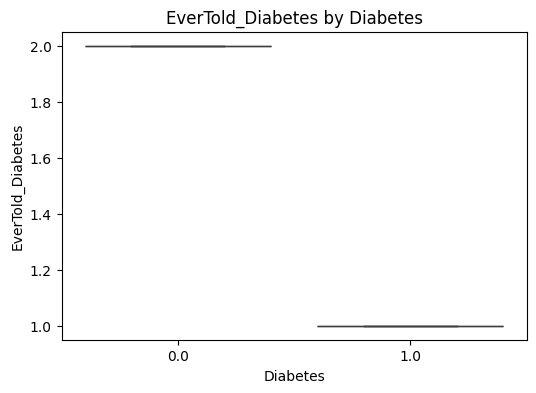

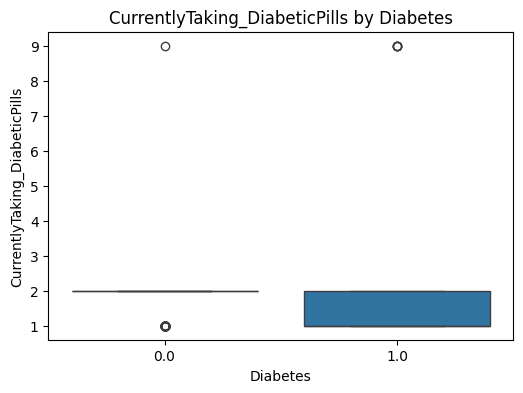

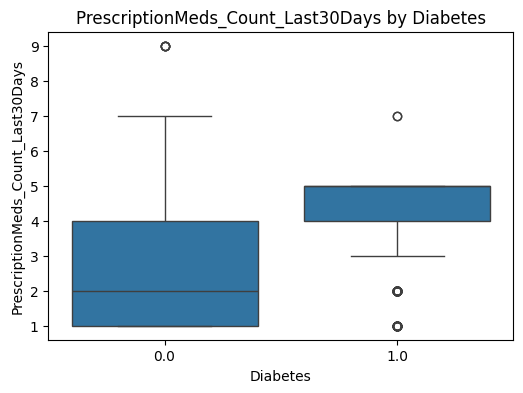

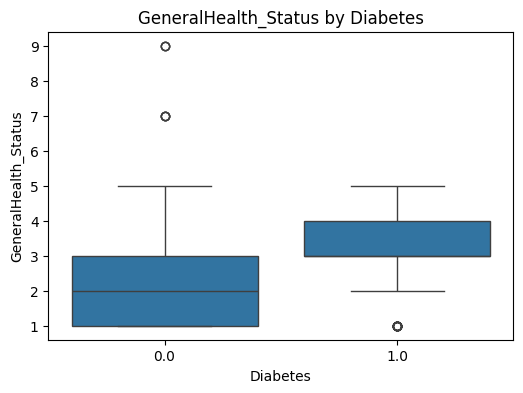

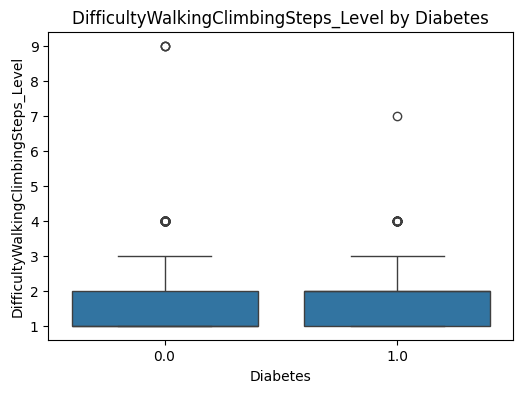

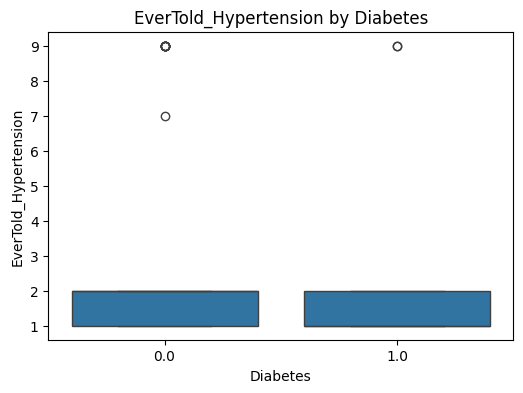


Saved: eda_missingness.csv, eda_top_correlations.csv
EDA complete.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === Load merged dataset ===
df = pd.read_csv("data/merged_dataset.csv")
print("Loaded merged dataset:", df.shape)

# Ensure target exists
if "Diabetes" not in df.columns:
    raise ValueError("Diabetes column missing. Check merge step.")

# ===============================
# 1. CLASS BALANCE
# ===============================
print("\n=== CLASS BALANCE ===")
print(df["Diabetes"].value_counts(dropna=False))
print("\nProportion:")
print(df["Diabetes"].value_counts(normalize=True))

# ===============================
# 2. MISSINGNESS
# ===============================
missing = df.isna().mean().sort_values(ascending=False)
print("\n=== TOP 30 MISSINGNESS COLUMNS ===")
print((missing * 100).head(30).round(2))

print("\nColumns > 50% missing:")
print(list(missing[missing > 0.50].index))

# save missingness table
missing.to_csv("eda_missingness.csv")

# ===============================
# 3. BASIC DISTRIBUTIONS
# ===============================
for possible_age in ["RIDAGEYR", "Age", "age", "AgeAtInterview"]:
    if possible_age in df.columns:
        AGE_COL = possible_age
        break
else:
    AGE_COL = None

if AGE_COL:
    plt.figure(figsize=(8,4))
    sns.histplot(df[AGE_COL], bins=30)
    plt.title(f"Age Distribution ({AGE_COL})")
    plt.show()

# ===============================
# 4. DIABETES vs AGE
# ===============================
if AGE_COL:
    df['age_bucket'] = pd.cut(df[AGE_COL], bins=[0,29,39,49,59,69,120],
                              labels=["<30","30-39","40-49","50-59","60-69","70+"])

    age_diab = df.groupby("age_bucket")["Diabetes"].mean().reset_index()

    plt.figure(figsize=(8,4))
    sns.barplot(x="age_bucket", y="Diabetes", data=age_diab)
    plt.title("Diabetes prevalence by age bucket")
    plt.ylabel("Prevalence")
    plt.show()

# ===============================
# 5. TOP CORRELATED NUMERIC VARIABLES
# ===============================
num_cols = df.select_dtypes(include=["float", "int"]).columns
num_cols = [c for c in num_cols if c != "Diabetes"]

corrs = df[num_cols + ["Diabetes"]].corr()['Diabetes'].abs().sort_values(ascending=False)

print("\n=== TOP 20 NUMERIC CORRELATIONS ===")
print(corrs.head(20))

corrs.head(20).to_csv("eda_top_correlations.csv")

# OPTIONAL: Boxplots for top 6 predictors
top6 = corrs.head(7).index.tolist()  # includes Diabetes itself
top6 = [v for v in top6 if v != "Diabetes"][:6]

for v in top6:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Diabetes", y=v, data=df)
    plt.title(f"{v} by Diabetes")
    plt.show()

print("\nSaved: eda_missingness.csv, eda_top_correlations.csv")
print("EDA complete.")


In [26]:
import os

print("Files in data/:")
print(os.listdir("data"))

print("\nFiles in data/csv_clean/:")
print(os.listdir("data/csv_clean"))

print("\nFiles in data/merged/: (if folder exists)")
if os.path.exists("data/merged"):
    print(os.listdir("data/merged"))
else:
    print("No merged folder")


Files in data/:
['.DS_Store', 'merged_dataset.csv', 'extra', 'csv_clean', 'raw']

Files in data/csv_clean/:
['smoking_household_smokers.csv', 'mental_health_depression_screener.csv', 'income.csv', 'acculturation.csv', 'occupation.csv', 'physical_activity_youth.csv', 'hepatitis.csv', 'sleep_disorders.csv', 'hospital_utilization_access_to_care.csv', 'housing_characteristics.csv', 'ALL_CORRELATIONS_SUMMARY.csv', 'functioning.csv', 'diet_behavior_nutrition.csv', 'physical_activity.csv', 'oral_health.csv', 'smoking_recent_tobacco_use.csv', 'weight_history.csv', 'kidney_condition_urology.csv', 'dermatology.csv', 'early_childhood.csv', 'pesticide_use.csv', 'alcohol_use.csv', 'current_health_status.csv', 'medical_conditions.csv', 'prescription_medications.csv', 'blood_pressure_cholesterol.csv', 'immunization.csv', 'audiometry.csv', 'diabetes.csv', 'preventive_aspirin_use.csv', 'health_insurance.csv', 'smoking_cigarette_use.csv']

Files in data/merged/: (if folder exists)
No merged folder


Top 5 numeric predictors: ['EverTold_Diabetes', 'CurrentlyTaking_DiabeticPills', 'PrescriptionMeds_Count_Last30Days', 'GeneralHealth_Status', 'DifficultyWalkingClimbingSteps_Level']


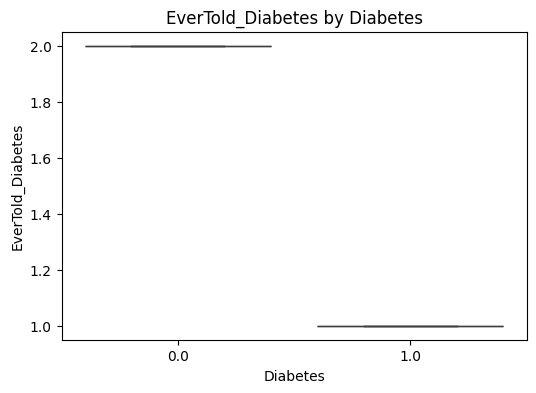

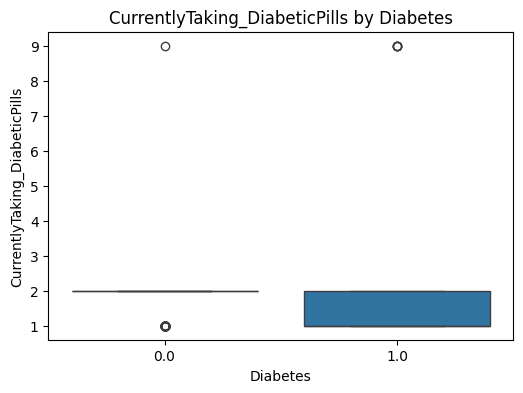

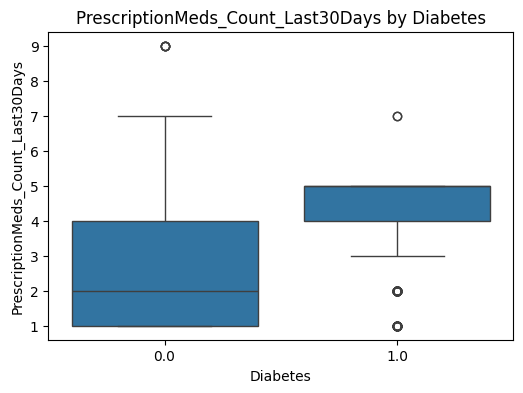

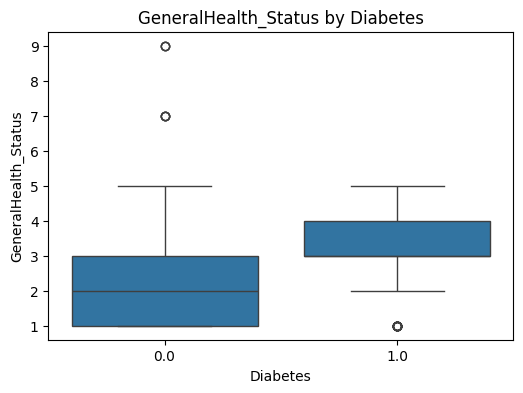

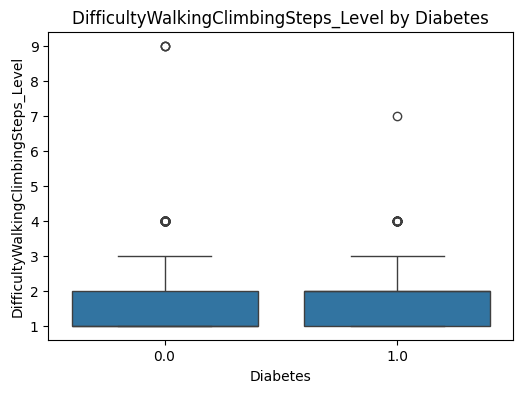

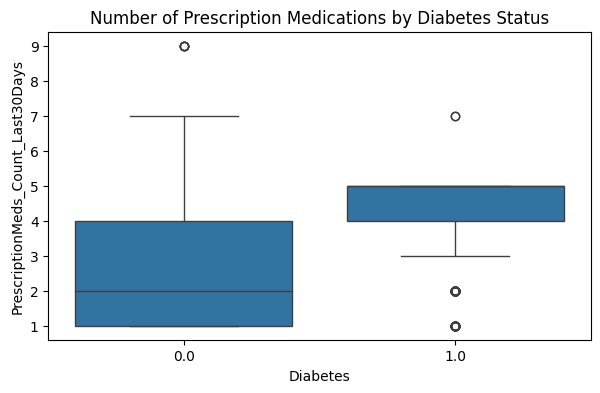

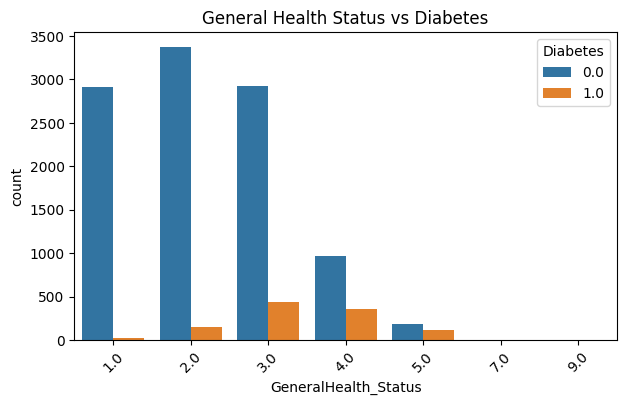

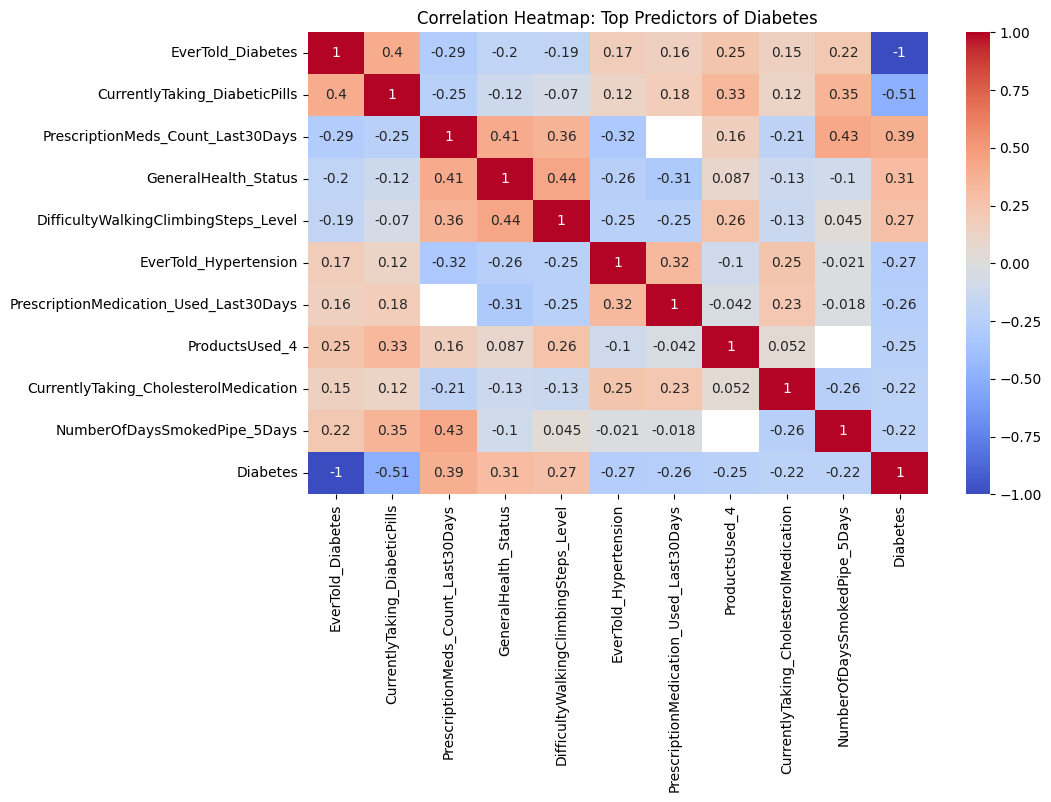

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data/merged_dataset.csv")

# Identify age column
age_col = None
for a in ["RIDAGEYR","Age","age","AgeAtInterview"]:
    if a in df.columns:
        age_col = a
        break

# ================
# 1. AGE DISTRIBUTION
# ================
if age_col:
    plt.figure(figsize=(7,4))
    sns.histplot(df[age_col], bins=30)
    plt.title("Age Distribution in NHANES Sample")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

# ================
# 2. DIABETES PREVALENCE BY AGE GROUP
# ================
if age_col:
    df["age_bucket"] = pd.cut(
        df[age_col],
        bins=[0,29,39,49,59,69,120],
        labels=["<30","30-39","40-49","50-59","60-69","70+"]
    )

    prev = df.groupby("age_bucket")["Diabetes"].mean()

    plt.figure(figsize=(7,4))
    sns.barplot(x=prev.index, y=prev.values)
    plt.title("Diabetes Prevalence by Age Group")
    plt.ylabel("Diabetes Prevalence")
    plt.xlabel("Age Group")
    plt.show()

# ================
# 3. TOP 5 CORRELATED NUMERIC VARIABLES (boxplots)
# ================
num_cols = df.select_dtypes(include=["float","int"]).columns
num_cols = [c for c in num_cols if c != "Diabetes"]

corrs = df[num_cols + ["Diabetes"]].corr()["Diabetes"].abs().sort_values(ascending=False)

top5 = [v for v in corrs.index if v != "Diabetes"][:5]
print("Top 5 numeric predictors:", top5)

for v in top5:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Diabetes", y=v, data=df)
    plt.title(f"{v} by Diabetes")
    plt.show()

# ================
# 4. PRESCRIPTION MEDICATION COUNT DISTRIBUTION
# ================
if "PrescriptionMeds_Count_Last30Days" in df.columns:
    plt.figure(figsize=(7,4))
    sns.boxplot(x="Diabetes", y="PrescriptionMeds_Count_Last30Days", data=df)
    plt.title("Number of Prescription Medications by Diabetes Status")
    plt.show()

# ================
# 5. GENERAL HEALTH STATUS vs DIABETES (if available)
# ================
if "GeneralHealth_Status" in df.columns:
    plt.figure(figsize=(7,4))
    sns.countplot(x="GeneralHealth_Status", hue="Diabetes", data=df)
    plt.title("General Health Status vs Diabetes")
    plt.xticks(rotation=45)
    plt.show()

# ================
# 6. CORRELATION HEATMAP (TOP 10 VARS)
# ================
top10 = [v for v in corrs.index if v != "Diabetes"][:10]
plt.figure(figsize=(10,6))
sns.heatmap(df[top10 + ["Diabetes"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: Top Predictors of Diabetes")
plt.show()


In [28]:
# Per-file EDA (no merge) — copy/paste into your notebook
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# --- CONFIG ---
search_dirs = ["data/raw", "data/extra", "data"]   # folders to search for CSVs
out_dir = Path("outputs/eda_individual")
out_dir.mkdir(parents=True, exist_ok=True)

# --- HELPERS ---
def find_csvs(dirs):
    csvs = []
    for d in dirs:
        p = Path(d)
        if p.exists():
            for f in p.rglob("*.csv"):
                csvs.append(f)
    csvs = sorted(csvs)
    return csvs

def try_load_by_keywords(csv_paths, keywords):
    """Return first csv path containing any of keywords (case-insensitive) and the dataframe."""
    keywords = [k.lower() for k in keywords]
    for f in csv_paths:
        fname = f.name.lower()
        if any(k in fname for k in keywords):
            try:
                df = pd.read_csv(f)
                return f, df
            except Exception as e:
                print(f"Failed to read {f}: {e}")
    return None, None

def save_fig(fig, name):
    p = out_dir / name
    fig.savefig(p, bbox_inches="tight")
    plt.close(fig)

# plotting utilities
def bar_counts(series, title="", xlabel="", ylabel="count", fname=None):
    counts = series.value_counts(dropna=False)
    labels = [str(x) for x in counts.index]
    fig, ax = plt.subplots(figsize=(6,4))
    ax.bar(range(len(counts)), counts.values)
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.tight_layout()
    if fname:
        save_fig(fig, fname)
    else:
        plt.show()

def hist_numeric(series, title="", xlabel="", bins=30, fname=None):
    ser = pd.to_numeric(series, errors="coerce").dropna()
    if ser.empty:
        print("No numeric data to plot for:", title)
        return
    fig, ax = plt.subplots(figsize=(6,4))
    ax.hist(ser, bins=bins)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("count")
    ax.set_title(title)
    plt.tight_layout()
    if fname:
        save_fig(fig, fname)
    else:
        plt.show()

def top_correlations(df, target_col, top_n=10):
    """Return top absolute correlations between numeric vars and a target column (if both numeric)."""
    if target_col not in df.columns:
        return pd.DataFrame()
    df_num = df.select_dtypes(include=[np.number]).copy()
    if df_num.empty:
        return pd.DataFrame()
    # coerce target to numeric if possible
    df_num[target_col] = pd.to_numeric(df_num[target_col], errors="coerce")
    corrs = df_num.corr()[target_col].dropna().sort_values(key=lambda x: x.abs(), ascending=False)
    return corrs.head(top_n)

# --- FIND CSVs ---
csv_paths = find_csvs(search_dirs)
print(f"Found {len(csv_paths)} CSV files:")
for p in csv_paths:
    print(" -", p)

# --- TARGETED FILES (adjust keywords if your filenames differ) ---
files_to_try = {
    "diabetes": ["diabetes", "diab"],
    "demographics": ["demo", "demographics", "age"],
    "bp_chol": ["blood", "blood_pressure", "cholesterol", "bp_chol"],
    "functioning": ["functioning", "function"],
    "smoking": ["smoking", "tobacco", "cig"],
    "oral": ["oral", "dental", "gum", "teeth"],
    "alcohol": ["alcohol", "drinking"],
    # add more if you have other named CSVs
}

loaded = {}
for key, kws in files_to_try.items():
    path, df = try_load_by_keywords(csv_paths, kws)
    loaded[key] = {"path": path, "df": df}
    if path is not None:
        print(f"Loaded {key}: {path} (shape {df.shape})")
    else:
        print(f"No file found for {key} (keywords={kws})")

# --- PER-FILE EDA ---
summary_rows = []
for key, info in loaded.items():
    df = info["df"]
    path = info["path"]
    if df is None:
        continue
    print("\n" + "="*60)
    print(f"FILE: {key}  -->  {path}")
    print("- shape:", df.shape)
    print("- columns:", list(df.columns[:20]))
    # basic info
    info_text = {
        "file": key,
        "path": str(path),
        "n_rows": df.shape[0],
        "n_cols": df.shape[1],
        "n_missing_total": int(df.isna().sum().sum())
    }
    # missingness per column (top)
    miss = df.isna().mean().sort_values(ascending=False).head(10)
    print("\nTop missing% columns (top 10):")
    display(miss)
    # save missingness
    miss.to_csv(out_dir / f"{key}_missing_top10.csv")
    # numeric summary
    num = df.select_dtypes(include=[np.number]).columns.tolist()
    if num:
        print("\nNumeric summarie(s) (first 6 numeric cols):")
        display(df[num[:6]].describe().T)
        df[num[:6]].describe().to_csv(out_dir / f"{key}_numeric_summary.csv")
    else:
        print("\nNo numeric columns found.")

    # categorical / value counts for the most frequent columns
    # choose columns with few unique values
    nunique = df.nunique(dropna=False)
    small_cat = nunique[nunique <= 20].sort_values().index.tolist()  # <=20 unique values
    small_cat = [c for c in small_cat if c not in num]  # skip numeric columns
    print(f"\nCategorical-ish columns with <=20 unique values (showing up to 12): {small_cat[:12]}")
    for c in small_cat[:12]:
        print(f"\nValue counts for {c}:")
        display(df[c].value_counts(dropna=False).head(20))
        bar_counts(df[c], title=f"{key}: {c}", xlabel=c, fname=f"{key}_{c}_counts.png")

    # target-specific quick analyses for diabetes file
    if key == "diabetes":
        # try to detect target-like columns
        target_candidates = [c for c in df.columns if ("diabetes" in c.lower()) or ("told" in c.lower()) or ("ever" in c.lower())]
        print("\nDiabetes file - candidate target columns:", target_candidates)
        for c in target_candidates[:8]:
            print(f"\nValue counts for candidate {c}:")
            display(df[c].value_counts(dropna=False).head(30))
            bar_counts(df[c], title=f"{c} distribution", xlabel=c, fname=f"{key}_{c}_dist.png")
        # age columns inside diabetes file (if any)
        age_cols = [c for c in df.columns if "age" in c.lower()]
        for a in age_cols[:3]:
            print(f"\nAge column {a}: stats")
            display(df[a].describe())
            hist_numeric(df[a], title=f"{key} - {a} histogram", xlabel=a, fname=f"{key}_{a}_hist.png")

    # functioning-specific quick analyses
    if key == "functioning":
        func_cols = [c for c in df.columns if ("hear" in c.lower() or "walk" in c.lower() or "difficulty" in c.lower() or "disab" in c.lower())]
        print("\nFunctioning-like columns detected:", func_cols[:15])
        for c in func_cols[:10]:
            print(f"\nCounts for {c}:")
            display(df[c].value_counts(dropna=False).head(20))
            bar_counts(df[c], title=f"{key}: {c}", xlabel=c, fname=f"{key}_{c}_counts.png")

    # bp/chol quick analyses
    if key in ("bp_chol", "blood_pressure_cholesterol", "bp", "bp_cholesterol"):
        bp_cols = [c for c in df.columns if ("hypert" in c.lower() or "chol" in c.lower() or "pressure" in c.lower() or "blood" in c.lower())]
        print("\nBP/Chol-like columns:", bp_cols[:20])
        for c in bp_cols[:10]:
            print(f"\nCounts for {c}:")
            display(df[c].value_counts(dropna=False).head(30))
            bar_counts(df[c], title=f"{key}: {c}", xlabel=c, fname=f"{key}_{c}_counts.png")
        # numeric histograms
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        for c in numeric_cols[:6]:
            hist_numeric(df[c], title=f"{key}: {c}", xlabel=c, fname=f"{key}_{c}_hist.png")

    # smoking quick analyses
    if key == "smoking":
        smoke_cols = [c for c in df.columns if ("smok" in c.lower() or "tobacco" in c.lower() or "cig" in c.lower())]
        print("\nSmoking columns:", smoke_cols[:20])
        for c in smoke_cols[:12]:
            print(f"\nCounts for {c}:")
            display(df[c].value_counts(dropna=False).head(30))
            bar_counts(df[c], title=f"{key}: {c}", xlabel=c, fname=f"{key}_{c}_counts.png")

    # oral quick analyses
    if key == "oral":
        oral_cols = [c for c in df.columns if ("oral" in c.lower() or "gum" in c.lower() or "tooth" in c.lower() or "dental" in c.lower())]
        print("\nOral-like columns:", oral_cols[:20])
        for c in oral_cols[:12]:
            print(f"\nCounts for {c}:")
            display(df[c].value_counts(dropna=False).head(30))
            bar_counts(df[c], title=f"{key}: {c}", xlabel=c, fname=f"{key}_{c}_counts.png")

    # top correlations WITHIN THE FILE (if a diabetes-like target exists)
    # heuristics: check for a column named like 'EverTold_Diabetes' or 'Diabetes'
    target_names = [c for c in df.columns if "diabetes" in c.lower() or "ever" in c.lower() and "diab" in c.lower()]
    if target_names:
        target_col = target_names[0]
        print("\nTop correlations (within file) with target:", target_col)
        corrs = top_correlations(df, target_col, top_n=12)
        display(corrs)
        corrs.to_csv(out_dir / f"{key}_top_corrs.csv")
    # append summary row
    summary_rows.append(info_text)

# write summary CSV
summary_df = pd.DataFrame(summary_rows)
summary_df.to_csv(out_dir / "file_summaries.csv", index=False)
print("\nSaved file summaries and diagnostics to", out_dir)


Found 35 CSV files:
 - data/csv_clean/ALL_CORRELATIONS_SUMMARY.csv
 - data/csv_clean/acculturation.csv
 - data/csv_clean/alcohol_use.csv
 - data/csv_clean/audiometry.csv
 - data/csv_clean/blood_pressure_cholesterol.csv
 - data/csv_clean/current_health_status.csv
 - data/csv_clean/dermatology.csv
 - data/csv_clean/diabetes.csv
 - data/csv_clean/diet_behavior_nutrition.csv
 - data/csv_clean/early_childhood.csv
 - data/csv_clean/functioning.csv
 - data/csv_clean/health_insurance.csv
 - data/csv_clean/hepatitis.csv
 - data/csv_clean/hospital_utilization_access_to_care.csv
 - data/csv_clean/housing_characteristics.csv
 - data/csv_clean/immunization.csv
 - data/csv_clean/income.csv
 - data/csv_clean/kidney_condition_urology.csv
 - data/csv_clean/medical_conditions.csv
 - data/csv_clean/mental_health_depression_screener.csv
 - data/csv_clean/occupation.csv
 - data/csv_clean/oral_health.csv
 - data/csv_clean/pesticide_use.csv
 - data/csv_clean/physical_activity.csv
 - data/csv_clean/physical_a

DIQ060U                          0.971730
InsulinDuration                  0.970794
Age_DiabetesDiagnosis            0.907953
CurrentlyTaking_Insulin          0.907953
CurrentlyTaking_DiabeticPills    0.805773
EverTold_Prediabetes             0.316928
BloodSugarTest_Last3Years        0.292916
EverTold_Diabetes                0.000341
sequence_no                      0.000000
dtype: float64


Numeric summarie(s) (first 6 numeric cols):


,count,mean,std,min,25%,50%,75%,max
sequence_no,11744.0,136347.896373,3445.908868,130378.0,133359.75,136354.5,139327.25,142310.0
EverTold_Diabetes,11740.0,1.934497,0.358726,1.0,2.00,2.0,2.00,9.0
Age_DiabetesDiagnosis,1081.0,70.016651,140.780614,1.0,40.00,50.0,60.00,999.0
EverTold_Prediabetes,8022.0,1.898654,0.442506,1.0,2.00,2.0,2.00,9.0
BloodSugarTest_Last3Years,8304.0,1.818762,1.393894,1.0,1.00,2.0,2.00,9.0
CurrentlyTaking_Insulin,1081.0,1.681776,0.466002,1.0,1.00,2.0,2.00,2.0



Categorical-ish columns with <=20 unique values (showing up to 12): []

Diabetes file - candidate target columns: ['EverTold_Diabetes', 'Age_DiabetesDiagnosis', 'EverTold_Prediabetes']

Value counts for candidate EverTold_Diabetes:


EverTold_Diabetes
2.0    10371
1.0     1081
3.0      284
NaN        4
9.0        4
Name: count, dtype: int64


Value counts for candidate Age_DiabetesDiagnosis:


Age_DiabetesDiagnosis
NaN      10663
50.0        91
55.0        56
45.0        50
40.0        45
60.0        43
65.0        41
35.0        35
48.0        30
52.0        26
54.0        25
30.0        25
57.0        24
999.0       24
70.0        23
63.0        21
51.0        21
53.0        21
58.0        20
39.0        20
42.0        19
62.0        19
59.0        18
56.0        18
61.0        18
49.0        18
36.0        16
43.0        15
38.0        15
66.0        14
Name: count, dtype: int64


Value counts for candidate EverTold_Prediabetes:


EverTold_Prediabetes
2.0    7089
NaN    3722
1.0     918
9.0      15
Name: count, dtype: int64


Age column Age_DiabetesDiagnosis: stats


count    1081.000000
mean       70.016651
std       140.780614
min         1.000000
25%        40.000000
50%        50.000000
75%        60.000000
max       999.000000
Name: Age_DiabetesDiagnosis, dtype: float64


Top correlations (within file) with target: EverTold_Diabetes


EverTold_Diabetes                1.000000
CurrentlyTaking_DiabeticPills    0.398519
BloodSugarTest_Last3Years       -0.047794
sequence_no                      0.005236
EverTold_Prediabetes             0.003617
Name: EverTold_Diabetes, dtype: float64


FILE: bp_chol  -->  data/csv_clean/blood_pressure_cholesterol.csv
- shape: (8501, 6)
- columns: ['sequence_no', 'EverTold_Hypertension', 'ConfirmedHypertension_Visits', 'CurrentlyTaking_BloodPressureMedication', 'EverTold_HighCholesterol', 'CurrentlyTaking_CholesterolMedication']

Top missing% columns (top 10):


ConfirmedHypertension_Visits               0.650865
CurrentlyTaking_BloodPressureMedication    0.650747
EverTold_Hypertension                      0.000353
EverTold_HighCholesterol                   0.000353
CurrentlyTaking_CholesterolMedication      0.000353
sequence_no                                0.000000
dtype: float64


Numeric summarie(s) (first 6 numeric cols):


,count,mean,std,min,25%,50%,75%,max
sequence_no,8501.0,136369.136572,3443.283289,130378.0,133378.0,136402.0,139342.0,142310.0
EverTold_Hypertension,8498.0,1.659449,0.542253,1.0,1.0,2.0,2.0,9.0
ConfirmedHypertension_Visits,2968.0,1.229111,0.811571,1.0,1.0,1.0,1.0,9.0
CurrentlyTaking_BloodPressureMedication,2969.0,1.186932,0.476981,1.0,1.0,1.0,1.0,9.0
EverTold_HighCholesterol,8498.0,1.679925,0.755303,1.0,1.0,2.0,2.0,9.0
CurrentlyTaking_CholesterolMedication,8498.0,1.777006,0.625121,1.0,1.0,2.0,2.0,9.0



Categorical-ish columns with <=20 unique values (showing up to 12): []

BP/Chol-like columns: ['EverTold_Hypertension', 'ConfirmedHypertension_Visits', 'CurrentlyTaking_BloodPressureMedication', 'EverTold_HighCholesterol', 'CurrentlyTaking_CholesterolMedication']

Counts for EverTold_Hypertension:


EverTold_Hypertension
2.0    5518
1.0    2969
9.0      10
NaN       3
7.0       1
Name: count, dtype: int64


Counts for ConfirmedHypertension_Visits:


ConfirmedHypertension_Visits
NaN    5533
1.0    2468
2.0     474
9.0      25
7.0       1
Name: count, dtype: int64


Counts for CurrentlyTaking_BloodPressureMedication:


CurrentlyTaking_BloodPressureMedication
NaN    5532
1.0    2442
2.0     523
9.0       4
Name: count, dtype: int64


Counts for EverTold_HighCholesterol:


EverTold_HighCholesterol
2.0    5348
1.0    3096
9.0      53
NaN       3
7.0       1
Name: count, dtype: int64


Counts for CurrentlyTaking_CholesterolMedication:


CurrentlyTaking_CholesterolMedication
2.0    6339
1.0    2126
9.0      33
NaN       3
Name: count, dtype: int64


FILE: functioning  -->  data/csv_clean/functioning.csv
- shape: (10942, 32)
- columns: ['sequence_no', 'DifficultySeeing_Level', 'DifficultyHearing_Level', 'EquipmentForWalking', 'DifficultyWalkingWithoutAssistance_Level', 'DifficultyWalkingComparedToPeers_Level', 'DifficultyWithSelfCare_Level', 'DifficultyBeingUnderstoodAtHome_Level', 'DifficultyBeingUnderstoodOutside_Level', 'DifficultyLearningComparedToPeers_Level', 'DifficultyRememberingComparedToPeers_Level', 'DifficultyConcentratingOnEnjoyableActivities_Level', 'DifficultyAcceptingRoutineChanges_Level', 'DifficultyControllingBehavior_Level', 'DifficultyMakingFriends_Level', 'FrequencyOfAnxiety_Level', 'FrequencyOfSadness_Level', 'ChildDisabilityIndicator', 'DifficultySeeingWithGlasses_Level', 'DifficultyHearingWithAid_Level']

Top missing% columns (top 10):


DifficultyWalkingWithoutAssistance_Level              0.997989
DifficultyWalkingComparedToPeers_Level                0.747304
ChildDisabilityIndicator                              0.745385
FrequencyOfSadness_Level                              0.745293
DifficultyRememberingComparedToPeers_Level            0.745293
DifficultySeeing_Level                                0.745293
FrequencyOfAnxiety_Level                              0.745293
DifficultyControllingBehavior_Level                   0.745293
DifficultyAcceptingRoutineChanges_Level               0.745293
DifficultyConcentratingOnEnjoyableActivities_Level    0.745293
dtype: float64


Numeric summarie(s) (first 6 numeric cols):


,count,mean,std,min,25%,50%,75%,max
sequence_no,10942.0,136360.411077,3438.463284,130378.0,133384.25,136371.5,139332.75,142310.0
DifficultySeeing_Level,2787.0,1.186222,0.525840,1.0,1.00,1.0,1.00,9.0
DifficultyHearing_Level,2787.0,1.064227,0.386186,1.0,1.00,1.0,1.00,9.0
EquipmentForWalking,2787.0,1.994618,0.159548,1.0,2.00,2.0,2.00,9.0
DifficultyWalkingWithoutAssistance_Level,22.0,2.772727,0.869144,2.0,2.00,2.5,3.75,4.0
DifficultyWalkingComparedToPeers_Level,2765.0,1.051356,0.351093,1.0,1.00,1.0,1.00,9.0



Categorical-ish columns with <=20 unique values (showing up to 12): []

Functioning-like columns detected: ['DifficultySeeing_Level', 'DifficultyHearing_Level', 'EquipmentForWalking', 'DifficultyWalkingWithoutAssistance_Level', 'DifficultyWalkingComparedToPeers_Level', 'DifficultyWithSelfCare_Level', 'DifficultyBeingUnderstoodAtHome_Level', 'DifficultyBeingUnderstoodOutside_Level', 'DifficultyLearningComparedToPeers_Level', 'DifficultyRememberingComparedToPeers_Level', 'DifficultyConcentratingOnEnjoyableActivities_Level', 'DifficultyAcceptingRoutineChanges_Level', 'DifficultyControllingBehavior_Level', 'DifficultyMakingFriends_Level', 'ChildDisabilityIndicator']

Counts for DifficultySeeing_Level:


DifficultySeeing_Level
NaN    8155
1.0    2337
2.0     411
3.0      34
9.0       5
Name: count, dtype: int64


Counts for DifficultyHearing_Level:


DifficultyHearing_Level
NaN    8155
1.0    2647
2.0     126
3.0       9
9.0       4
4.0       1
Name: count, dtype: int64


Counts for EquipmentForWalking:


EquipmentForWalking
NaN    8155
2.0    2764
1.0      22
9.0       1
Name: count, dtype: int64


Counts for DifficultyWalkingWithoutAssistance_Level:


DifficultyWalkingWithoutAssistance_Level
NaN    10920
2.0       11
4.0        6
3.0        5
Name: count, dtype: int64


Counts for DifficultyWalkingComparedToPeers_Level:


DifficultyWalkingComparedToPeers_Level
NaN    8177
1.0    2662
2.0      83
3.0      16
9.0       3
4.0       1
Name: count, dtype: int64


Counts for DifficultyWithSelfCare_Level:


DifficultyWithSelfCare_Level
NaN    8155
1.0    2660
2.0     104
3.0      17
4.0       5
9.0       1
Name: count, dtype: int64


Counts for DifficultyBeingUnderstoodAtHome_Level:


DifficultyBeingUnderstoodAtHome_Level
NaN    8155
1.0    2523
2.0     225
3.0      28
4.0      10
9.0       1
Name: count, dtype: int64


Counts for DifficultyBeingUnderstoodOutside_Level:


DifficultyBeingUnderstoodOutside_Level
NaN    8155
1.0    2402
2.0     318
3.0      54
4.0      11
9.0       2
Name: count, dtype: int64


Counts for DifficultyLearningComparedToPeers_Level:


DifficultyLearningComparedToPeers_Level
NaN    8155
1.0    2241
2.0     428
3.0     112
4.0       4
9.0       2
Name: count, dtype: int64


Counts for DifficultyRememberingComparedToPeers_Level:


DifficultyRememberingComparedToPeers_Level
NaN    8155
1.0    2195
2.0     505
3.0      81
9.0       4
4.0       2
Name: count, dtype: int64


FILE: smoking  -->  data/csv_clean/smoking_cigarette_use.csv
- shape: (9015, 9)
- columns: ['sequence_no', 'SmokedAtLeast100CigarettesInLife', 'CurrentCigaretteSmoking', 'CigarettesSmokedDays_30Days', 'CigarettesPerDayOnSmokingDays_30Days', 'SmokingTypeMenthol', 'TotalCigarettesSmoked', 'FirstCigaretteAge', 'QuestionnaireModeFlag']

Top missing% columns (top 10):


FirstCigaretteAge                       0.997449
CigarettesSmokedDays_30Days             0.969717
TotalCigarettesSmoked                   0.914365
SmokingTypeMenthol                      0.869662
CigarettesPerDayOnSmokingDays_30Days    0.868552
CurrentCigaretteSmoking                 0.640266
SmokedAtLeast100CigarettesInLife        0.097615
sequence_no                             0.000000
QuestionnaireModeFlag                   0.000000
dtype: float64


Numeric summarie(s) (first 6 numeric cols):


,count,mean,std,min,25%,50%,75%,max
sequence_no,9015.0,136359.323683,3442.785456,1.303780e+05,1.333785e+05,1.363920e+05,139327.0,142310.0
SmokedAtLeast100CigarettesInLife,8135.0,1.611678,0.558182,1.000000e+00,1.000000e+00,2.000000e+00,2.0,9.0
CurrentCigaretteSmoking,3243.0,2.339500,0.900889,1.000000e+00,1.000000e+00,3.000000e+00,3.0,3.0
CigarettesSmokedDays_30Days,273.0,12.728938,14.662369,5.397605e-79,3.000000e+00,1.000000e+01,20.0,99.0
CigarettesPerDayOnSmokingDays_30Days,1185.0,18.998312,86.343555,1.000000e+00,5.000000e+00,1.000000e+01,20.0,999.0
SmokingTypeMenthol,1175.0,0.414468,0.653359,5.397605e-79,5.397605e-79,5.397605e-79,1.0,9.0



Categorical-ish columns with <=20 unique values (showing up to 12): []

Smoking columns: ['SmokedAtLeast100CigarettesInLife', 'CurrentCigaretteSmoking', 'CigarettesSmokedDays_30Days', 'CigarettesPerDayOnSmokingDays_30Days', 'SmokingTypeMenthol', 'TotalCigarettesSmoked', 'FirstCigaretteAge']

Counts for SmokedAtLeast100CigarettesInLife:


SmokedAtLeast100CigarettesInLife
2.0    4878
1.0    3243
NaN     880
9.0       7
7.0       7
Name: count, dtype: int64


Counts for CurrentCigaretteSmoking:


CurrentCigaretteSmoking
NaN    5772
3.0    2053
1.0     952
2.0     238
Name: count, dtype: int64


Counts for CigarettesSmokedDays_30Days:


CigarettesSmokedDays_30Days
NaN             8742
2.000000e+01      39
1.500000e+01      35
1.000000e+01      30
2.000000e+00      24
5.397605e-79      23
3.000000e+00      21
1.000000e+00      14
3.000000e+01      13
1.200000e+01      12
5.000000e+00       9
2.500000e+01       9
8.000000e+00       9
6.000000e+00       7
4.000000e+00       7
9.900000e+01       5
1.400000e+01       3
7.000000e+00       3
2.700000e+01       2
2.800000e+01       2
2.200000e+01       2
1.700000e+01       1
1.800000e+01       1
2.300000e+01       1
2.900000e+01       1
Name: count, dtype: int64


Counts for CigarettesPerDayOnSmokingDays_30Days:


CigarettesPerDayOnSmokingDays_30Days
NaN      7830
10.0      217
20.0      205
5.0        98
1.0        94
15.0       87
2.0        86
6.0        56
4.0        56
3.0        54
7.0        45
12.0       38
30.0       31
8.0        30
40.0       28
25.0       14
999.0       9
16.0        6
11.0        5
9.0         4
18.0        4
60.0        3
95.0        2
24.0        2
50.0        2
13.0        2
35.0        1
17.0        1
21.0        1
38.0        1
Name: count, dtype: int64


Counts for SmokingTypeMenthol:


SmokingTypeMenthol
NaN             7840
5.397605e-79     712
1.000000e+00     460
9.000000e+00       3
Name: count, dtype: int64


Counts for TotalCigarettesSmoked:


TotalCigarettesSmoked
NaN     8243
1.0      720
2.0       28
3.0        6
6.0        5
5.0        4
4.0        4
7.0        2
8.0        2
99.0       1
Name: count, dtype: int64


Counts for FirstCigaretteAge:


FirstCigaretteAge
NaN     8992
14.0       5
13.0       5
12.0       4
16.0       4
11.0       2
15.0       1
9.0        1
10.0       1
Name: count, dtype: int64


FILE: oral  -->  data/csv_clean/oral_health.csv
- shape: (11744, 8)
- columns: ['sequence_no', 'OverallHealth_TeethAndGums', 'MouthPain_Frequency_LastYear', 'LifeSatisfaction_Impact_TeethIssues', 'JobSchoolImpact_TeethIssues', 'AvoidedFoods_TeethIssues', 'DiscomfortEating_TeethIssues', 'SelfConscious_TeethIssues']

Top missing% columns (top 10):


AvoidedFoods_TeethIssues               0.335490
SelfConscious_TeethIssues              0.335490
LifeSatisfaction_Impact_TeethIssues    0.335405
JobSchoolImpact_TeethIssues            0.335405
DiscomfortEating_TeethIssues           0.335405
OverallHealth_TeethAndGums             0.000426
MouthPain_Frequency_LastYear           0.000426
sequence_no                            0.000000
dtype: float64


Numeric summarie(s) (first 6 numeric cols):


,count,mean,std,min,25%,50%,75%,max
sequence_no,11744.0,136347.896373,3445.908868,130378.0,133359.75,136354.5,139327.25,142310.0
OverallHealth_TeethAndGums,11739.0,2.609507,1.226030,1.0,2.00,3.0,3.00,9.0
MouthPain_Frequency_LastYear,11739.0,4.191498,0.990821,1.0,4.00,4.0,5.00,9.0
LifeSatisfaction_Impact_TeethIssues,7805.0,4.446637,0.985870,1.0,4.00,5.0,5.00,9.0
JobSchoolImpact_TeethIssues,7805.0,4.793081,0.644818,1.0,5.00,5.0,5.00,9.0
AvoidedFoods_TeethIssues,7804.0,4.313557,1.113438,1.0,4.00,5.0,5.00,9.0



Categorical-ish columns with <=20 unique values (showing up to 12): []

Oral-like columns: ['OverallHealth_TeethAndGums']

Counts for OverallHealth_TeethAndGums:


OverallHealth_TeethAndGums
3.0    3539
2.0    2950
1.0    2634
4.0    1656
5.0     944
9.0      13
NaN       5
7.0       3
Name: count, dtype: int64


FILE: alcohol  -->  data/csv_clean/alcohol_use.csv
- shape: (6337, 9)
- columns: ['sequence_no', 'EverHad_Alcohol', 'AlcoholConsumptionFrequency_12Months', 'AverageDrinksPerDrinkingDay_12Months', 'MoreThanSpecificNumberOfDrinksFrequency', 'HeavyDrinkingWithinTwoHoursFrequency_12Months', 'MoreThan8DrinksPerDay_12Months', 'DailyHeavyDrinkingHistory', 'OccasionsWithHeavyDrinking_30Days']

Top missing% columns (top 10):


OccasionsWithHeavyDrinking_30Days                0.627900
MoreThan8DrinksPerDay_12Months                   0.627268
HeavyDrinkingWithinTwoHoursFrequency_12Months    0.626637
AverageDrinksPerDrinkingDay_12Months             0.357898
MoreThanSpecificNumberOfDrinksFrequency          0.355847
DailyHeavyDrinkingHistory                        0.226606
AlcoholConsumptionFrequency_12Months             0.223292
EverHad_Alcohol                                  0.135080
sequence_no                                      0.000000
dtype: float64


Numeric summarie(s) (first 6 numeric cols):


,count,mean,std,min,25%,50%,75%,max
sequence_no,6337.0,136348.738362,3439.132476,1.303780e+05,1.333370e+05,136397.0,139310.0,142310.0
EverHad_Alcohol,5481.0,1.109104,0.385114,1.000000e+00,1.000000e+00,1.0,1.0,9.0
AlcoholConsumptionFrequency_12Months,4922.0,5.030679,4.314321,5.397605e-79,2.000000e+00,5.0,8.0,99.0
AverageDrinksPerDrinkingDay_12Months,4069.0,5.842959,54.996448,1.000000e+00,1.000000e+00,2.0,3.0,999.0
MoreThanSpecificNumberOfDrinksFrequency,4082.0,4.742283,7.326042,5.397605e-79,5.397605e-79,4.0,9.0,99.0
HeavyDrinkingWithinTwoHoursFrequency_12Months,2366.0,4.838123,7.785415,5.397605e-79,5.397605e-79,4.0,9.0,99.0



Categorical-ish columns with <=20 unique values (showing up to 12): []

Saved file summaries and diagnostics to outputs/eda_individual


In [29]:
# EDA presentation plots (file-by-file)
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
OUTDIR = "outputs/eda_plots"
os.makedirs(OUTDIR, exist_ok=True)

# small helper to save and show
def save_show(fig, fname):
    path = os.path.join(OUTDIR, fname)
    fig.savefig(path, bbox_inches="tight")
    plt.show()
    plt.close(fig)


In [30]:
# Extract dataframes from the "loaded" dictionary
df_diabetes   = loaded["diabetes"]["df"]
df_bp         = loaded["bp_chol"]["df"]
df_func       = loaded["functioning"]["df"]
df_smoke      = loaded["smoking"]["df"]
df_oral       = loaded["oral"]["df"]
df_alcohol    = loaded["alcohol"]["df"]

print("All EDA dataframes loaded into variables:")
for name in ["df_diabetes","df_bp","df_func","df_smoke","df_oral","df_alcohol"]:
    print(" -", name)


All EDA dataframes loaded into variables:
 - df_diabetes
 - df_bp
 - df_func
 - df_smoke
 - df_oral
 - df_alcohol


EverTold_Diabetes value counts (raw):
EverTold_Diabetes
2.0    10371
1.0     1081
3.0      284
NaN        4
9.0        4
Name: count, dtype: int64


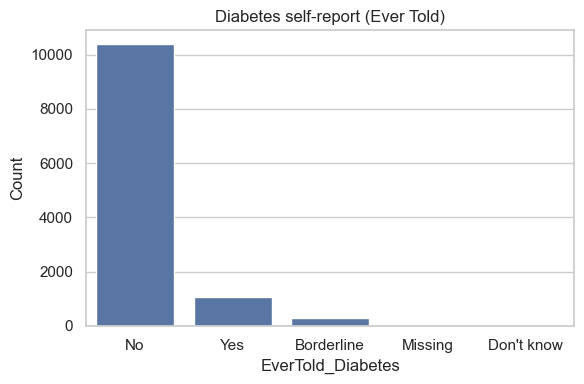

In [31]:
df = df_diabetes

print("EverTold_Diabetes value counts (raw):")
print(df['EverTold_Diabetes'].value_counts(dropna=False))

mapping = {1.0:"Yes", 2.0:"No", 3.0:"Borderline", 9.0:"Don't know"}
cats = df['EverTold_Diabetes'].map(mapping).fillna("Missing")

fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x=cats, order=cats.value_counts().index, ax=ax)
ax.set_title("Diabetes self-report (Ever Told)")
ax.set_ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Non-missing Age_DiabetesDiagnosis count: 1057


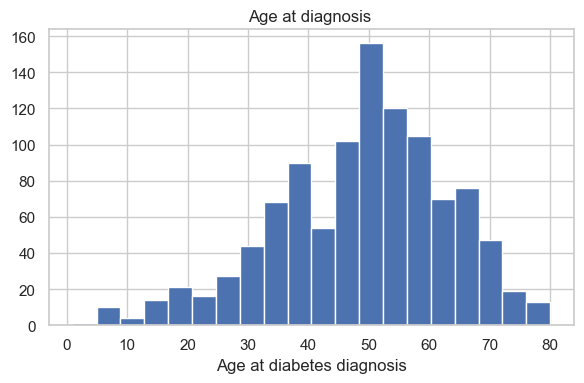

In [32]:
if 'Age_DiabetesDiagnosis' in df.columns:
    s = pd.to_numeric(df['Age_DiabetesDiagnosis'], errors='coerce')
    s_clean = s.replace(999, np.nan).dropna()

    print("Non-missing Age_DiabetesDiagnosis count:", len(s_clean))

    fig, ax = plt.subplots(figsize=(6,4))
    ax.hist(s_clean, bins=20)
    ax.set_xlabel("Age at diabetes diagnosis")
    ax.set_title("Age at diagnosis ")
    plt.tight_layout()
    plt.show()



Counts for EverTold_Hypertension
EverTold_Hypertension
2.0    5518
1.0    2969
9.0      10
NaN       3
7.0       1
Name: count, dtype: int64


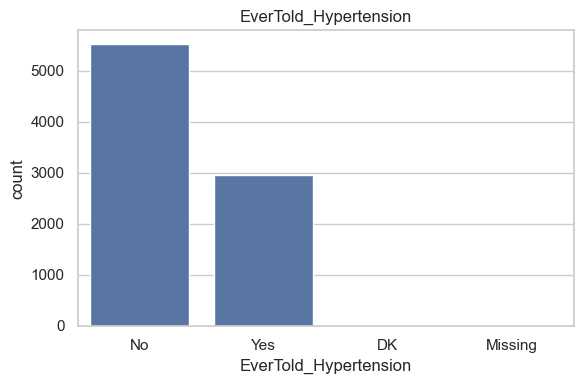


Counts for EverTold_HighCholesterol
EverTold_HighCholesterol
2.0    5348
1.0    3096
9.0      53
NaN       3
7.0       1
Name: count, dtype: int64


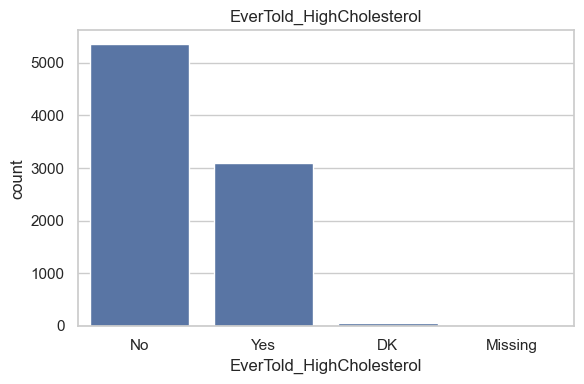


Counts for CurrentlyTaking_BloodPressureMedication
CurrentlyTaking_BloodPressureMedication
NaN    5532
1.0    2442
2.0     523
9.0       4
Name: count, dtype: int64


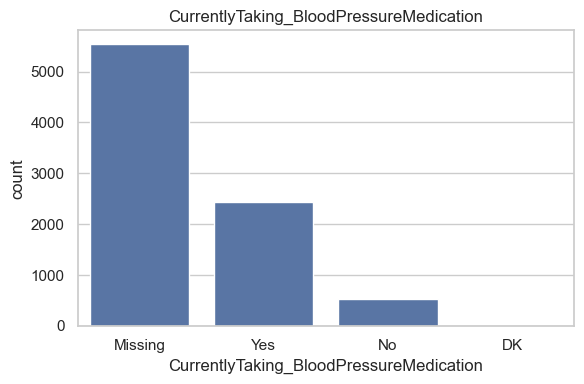


Counts for CurrentlyTaking_CholesterolMedication
CurrentlyTaking_CholesterolMedication
2.0    6339
1.0    2126
9.0      33
NaN       3
Name: count, dtype: int64


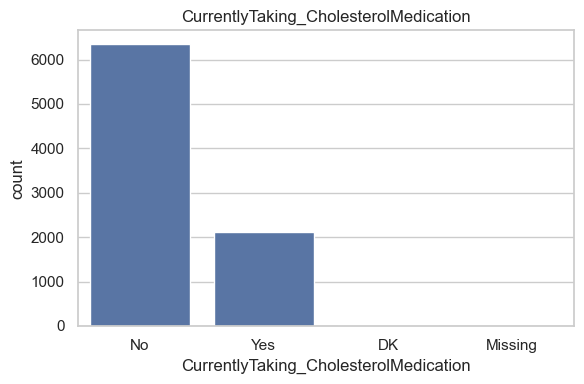

In [33]:
df = df_bp

cols = [
    'EverTold_Hypertension',
    'EverTold_HighCholesterol',
    'CurrentlyTaking_BloodPressureMedication',
    'CurrentlyTaking_CholesterolMedication'
]

for c in cols:
    if c in df.columns:
        print("\nCounts for", c)
        print(df[c].value_counts(dropna=False))

        m = df[c].map({1.0:"Yes",2.0:"No",9.0:"DK"}).fillna("Missing")

        fig, ax = plt.subplots(figsize=(6,4))
        sns.countplot(x=m, order=m.value_counts().index, ax=ax)
        ax.set_title(c)
        plt.tight_layout()
        plt.show()



Counts for DifficultyHearing_Level
DifficultyHearing_Level
NaN    8155
1.0    2647
2.0     126
3.0       9
9.0       4
Name: count, dtype: int64


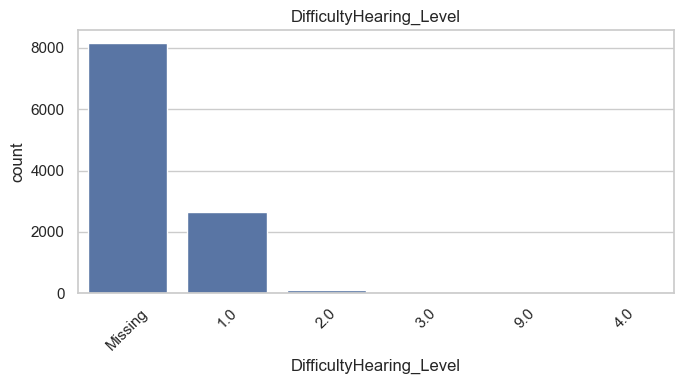


Counts for DifficultySeeing_Level
DifficultySeeing_Level
NaN    8155
1.0    2337
2.0     411
3.0      34
9.0       5
Name: count, dtype: int64


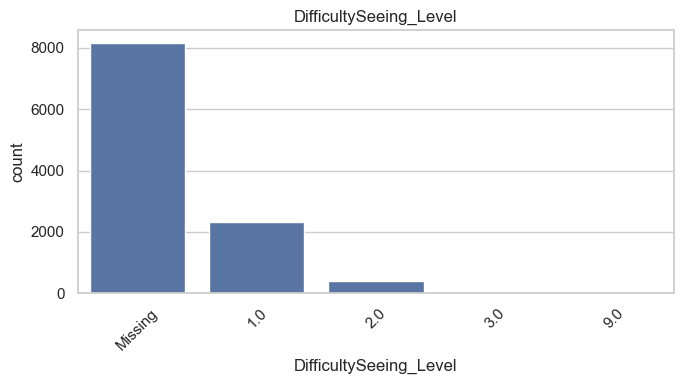


Counts for DifficultyWalkingComparedToPeers_Level
DifficultyWalkingComparedToPeers_Level
NaN    8177
1.0    2662
2.0      83
3.0      16
9.0       3
Name: count, dtype: int64


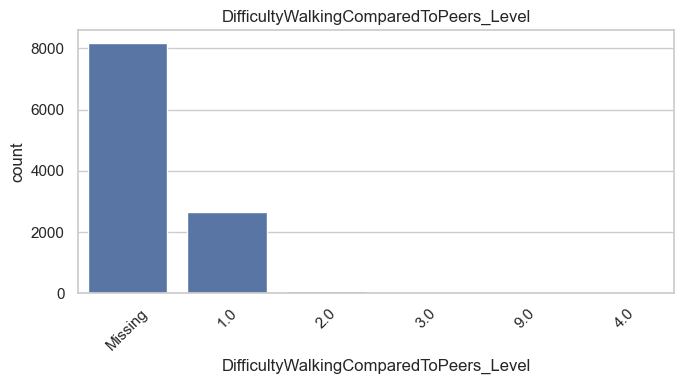


Counts for DifficultyWithSelfCare_Level
DifficultyWithSelfCare_Level
NaN    8155
1.0    2660
2.0     104
3.0      17
4.0       5
Name: count, dtype: int64


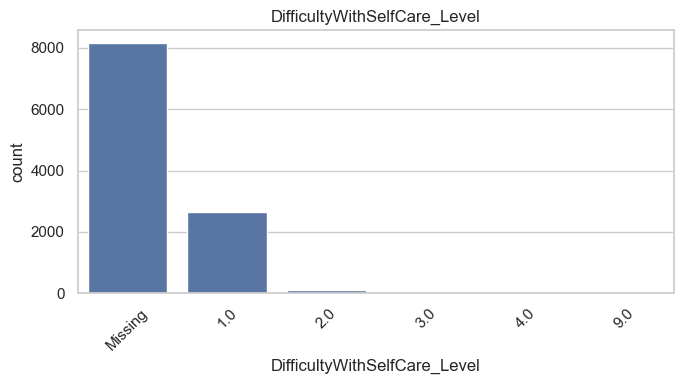


Counts for DifficultyLearningComparedToPeers_Level
DifficultyLearningComparedToPeers_Level
NaN    8155
1.0    2241
2.0     428
3.0     112
4.0       4
Name: count, dtype: int64


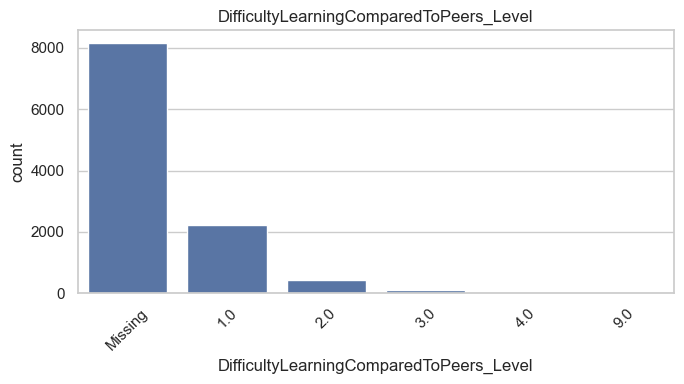

In [34]:
df = df_func

func_vars = [
    'DifficultyHearing_Level',
    'DifficultySeeing_Level',
    'DifficultyWalkingComparedToPeers_Level',
    'DifficultyWithSelfCare_Level',
    'DifficultyLearningComparedToPeers_Level'
]

for c in func_vars:
    if c in df.columns:
        print("\nCounts for", c)
        print(df[c].value_counts(dropna=False).head())

        vals = df[c].fillna("Missing").astype(str)

        fig, ax = plt.subplots(figsize=(7,4))
        sns.countplot(x=vals, order=vals.value_counts().index, ax=ax)
        ax.set_title(c)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()



Counts for SmokedAtLeast100CigarettesInLife
SmokedAtLeast100CigarettesInLife
2.0    4878
1.0    3243
NaN     880
9.0       7
7.0       7
Name: count, dtype: int64


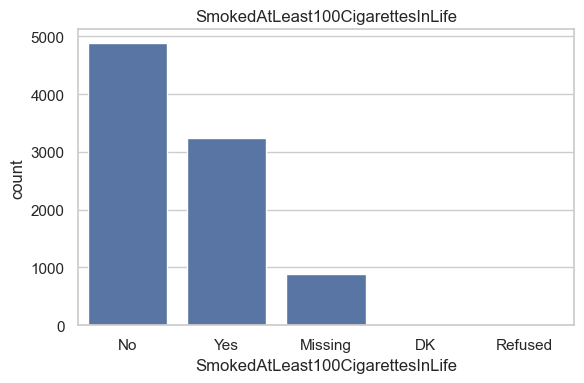


Counts for CurrentCigaretteSmoking
CurrentCigaretteSmoking
NaN    5772
3.0    2053
1.0     952
2.0     238
Name: count, dtype: int64


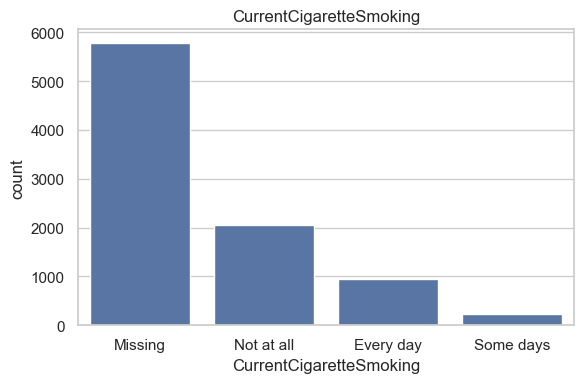

In [35]:
df = df_smoke

for c in ['SmokedAtLeast100CigarettesInLife', 'CurrentCigaretteSmoking']:
    if c in df.columns:
        print("\nCounts for", c)
        print(df[c].value_counts(dropna=False))

        if c == 'SmokedAtLeast100CigarettesInLife':
            m = df[c].map({1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"DK"}).fillna("Missing")
        else:
            m = df[c].map({1.0:"Every day",2.0:"Some days",3.0:"Not at all"}).fillna("Missing")

        fig, ax = plt.subplots(figsize=(6,4))
        sns.countplot(x=m, order=m.value_counts().index, ax=ax)
        ax.set_title(c)
        plt.tight_layout()
        plt.show()


OverallHealth_TeethAndGums
3.0    3539
2.0    2950
1.0    2634
4.0    1656
5.0     944
9.0      13
NaN       5
7.0       3
Name: count, dtype: int64


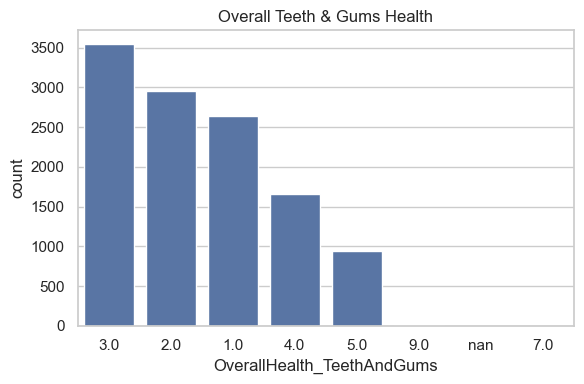

In [36]:
df = df_oral

if 'OverallHealth_TeethAndGums' in df.columns:
    print(df['OverallHealth_TeethAndGums'].value_counts(dropna=False))

    vals = df['OverallHealth_TeethAndGums'].astype(str)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.countplot(x=vals, order=vals.value_counts().index, ax=ax)
    ax.set_title("Overall Teeth & Gums Health")
    plt.tight_layout()
    plt.show()


EverHad_Alcohol
1.0    4918
NaN     856
2.0     558
9.0       5
Name: count, dtype: int64


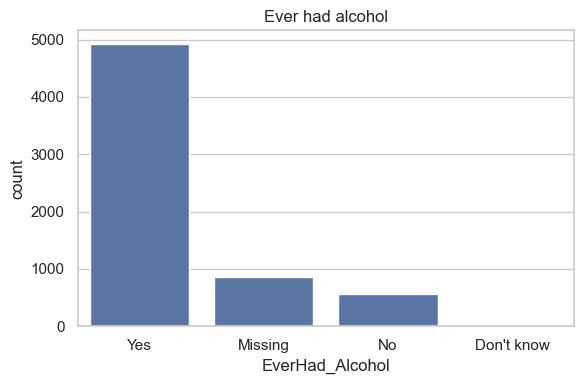

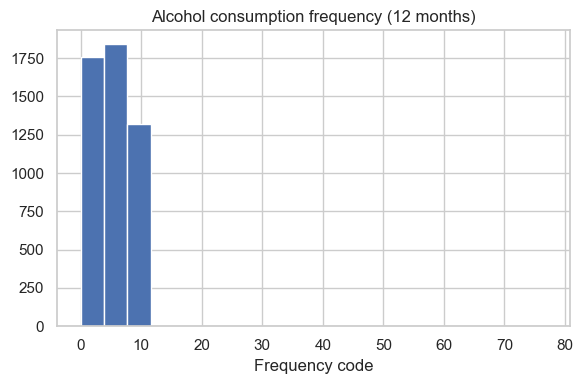

In [37]:
df = df_alcohol

# Ever had alcohol
if 'EverHad_Alcohol' in df.columns:
    print(df['EverHad_Alcohol'].value_counts(dropna=False))

    vals = df['EverHad_Alcohol'].map({1.0:"Yes",2.0:"No",9.0:"Don't know"}).fillna("Missing")

    fig, ax = plt.subplots(figsize=(6,4))
    sns.countplot(x=vals, order=vals.value_counts().index, ax=ax)
    ax.set_title("Ever had alcohol")
    plt.tight_layout()
    plt.show()

# Alcohol frequency (12 months)
if 'AlcoholConsumptionFrequency_12Months' in df.columns:
    ser = pd.to_numeric(df['AlcoholConsumptionFrequency_12Months'], errors='coerce')
    ser = ser.replace(99, np.nan).dropna()

    fig, ax = plt.subplots(figsize=(6,4))
    ax.hist(ser, bins=20)
    ax.set_title("Alcohol consumption frequency (12 months)")
    plt.xlabel("Frequency code")
    plt.tight_layout()
    plt.show()


In [38]:
print("=== diabetes columns ===")
print(df_diab.columns)

print("\n=== bp_chol columns ===")
print(df_bp.columns)

print("\n=== smoking columns ===")
print(df_smok.columns)

# If these exist:
if 'mental_health_depression_screener' in loaded:
    df_mental = loaded["mental_health_depression_screener"]["df"]
    print("\n=== mental health columns ===")
    print(df_mental.columns)

if 'sleep_disorders' in loaded:
    df_sleep = loaded["sleep_disorders"]["df"]
    print("\n=== sleep columns ===")
    print(df_sleep.columns)

if 'hospital_utilization_access_to_care' in loaded:
    df_hosp = loaded["hospital_utilization_access_to_care"]["df"]
    print("\n=== hospital utilization columns ===")
    print(df_hosp.columns)

# Try to find gender in any file:
for key, val in loaded.items():
    df = val["df"]
    if df is not None:
        if any(col.lower().startswith("gender") or col.lower().startswith("sex") for col in df.columns):
            print("\n=== Gender found in file:", key)
            print(df.columns)


=== diabetes columns ===


NameError: name 'df_diab' is not defined

In [39]:
merged = df_diab[['sequence_no','EverTold_Diabetes']].merge(
    df_bp[['sequence_no','EverTold_Hypertension']], on='sequence_no', how='left'
)

sns.countplot(x=merged['EverTold_Hypertension'], hue=merged['EverTold_Diabetes'])
plt.title("Hypertension vs Diabetes")
plt.show()

print("Correlation:")
print(merged[['EverTold_Diabetes','EverTold_Hypertension']].corr())


NameError: name 'df_diab' is not defined

In [40]:
sns.countplot(x=df_smok['SmokedAtLeast100CigarettesInLife'].fillna("Missing"))
plt.title("Ever Smoked ≥100 Cigarettes")
plt.show()


NameError: name 'df_smok' is not defined

In [41]:
sns.countplot(x=df_smok['CurrentCigaretteSmoking'].fillna("Missing"))
plt.title("Current Smoking Status")
plt.show()


NameError: name 'df_smok' is not defined

In [42]:
merged = df_smok[['SmokedAtLeast100CigarettesInLife','CurrentCigaretteSmoking']].copy()

merged['EverSmoked'] = merged['SmokedAtLeast100CigarettesInLife'].map({1.0:"Yes",2.0:"No"}).fillna("Missing")
merged['CurrentSmoker'] = merged['CurrentCigaretteSmoking'].map({1.0:"Daily",2.0:"Some days",3.0:"Not at all"}).fillna("Missing")

print(pd.crosstab(merged['EverSmoked'], merged['CurrentSmoker']))


NameError: name 'df_smok' is not defined

In [43]:
print("\nSearching for depression variables...")
for key,v in loaded.items():
    df = v["df"]
    if df is not None:
        for col in df.columns:
            if "depress" in col.lower():
                print("FOUND in:", key, "| column:", col)

print("\nSearching for gender variables...")
for key,v in loaded.items():
    df = v["df"]
    if df is not None:
        for col in df.columns:
            if "gender" in col.lower() or "sex" in col.lower():
                print("FOUND in:", key, "| column:", col)

print("\nSearching for doctor visit variables...")
for key,v in loaded.items():
    df = v["df"]
    if df is not None:
        for col in df.columns:
            if "doctor" in col.lower() or "visit" in col.lower():
                print("FOUND in:", key, "| column:", col)



Searching for depression variables...
FOUND in: functioning | column: FrequencyDepressed
FOUND in: functioning | column: LevelOfDepression

Searching for gender variables...

Searching for doctor visit variables...
FOUND in: bp_chol | column: ConfirmedHypertension_Visits


In [44]:
df_dep = df_func[['sequence_no','FrequencyDepressed','LevelOfDepression']]

merged = df_diab[['sequence_no','EverTold_Diabetes']].merge(
    df_dep, on='sequence_no', how='left'
)

# Boxplot depression frequency vs diabetes
sns.boxplot(x=merged['EverTold_Diabetes'], y=merged['FrequencyDepressed'])
plt.title("Frequency of Depression vs Diabetes")
plt.show()

# Correlation
print("Correlation with diabetes:")
print(merged[['EverTold_Diabetes','FrequencyDepressed']].corr())



NameError: name 'df_diab' is not defined

In [45]:
merged = df_diab[['sequence_no','EverTold_Diabetes']].merge(
    df_bp[['sequence_no','ConfirmedHypertension_Visits']], on='sequence_no', how='left'
)

sns.countplot(x=merged['ConfirmedHypertension_Visits'], hue=merged['EverTold_Diabetes'])
plt.title("Hypertension Confirmation Visits vs Diabetes")
plt.show()

print("Correlation:")
print(merged[['EverTold_Diabetes','ConfirmedHypertension_Visits']].corr())
"

SyntaxError: unterminated string literal (detected at line 11) (27903114.py, line 11)

In [46]:
# MASTER VARIABLE SCANNER
# Shows every variable in every file + counts
# Works with your "loaded" dictionary from earlier

all_variables = {}

print("====================================")
print("      FULL VARIABLE INVENTORY       ")
print("====================================\n")

for key, item in loaded.items():
    df = item["df"]
    if df is not None:
        cols = list(df.columns)
        all_variables[key] = cols
        
        print(f"\n📁 FILE: {key}")
        print(f"➡ Total columns: {len(cols)}")
        print("------------------------------------")
        for c in cols:
            print("  -", c)

# Save dictionary for later use (optional)
import json
with open("all_variables.json", "w") as f:
    json.dump(all_variables, f, indent=4)

print("\n\n✔ Variable inventory saved as all_variables.json")


      FULL VARIABLE INVENTORY       


📁 FILE: diabetes
➡ Total columns: 9
------------------------------------
  - sequence_no
  - EverTold_Diabetes
  - Age_DiabetesDiagnosis
  - EverTold_Prediabetes
  - BloodSugarTest_Last3Years
  - CurrentlyTaking_Insulin
  - InsulinDuration
  - DIQ060U
  - CurrentlyTaking_DiabeticPills

📁 FILE: bp_chol
➡ Total columns: 6
------------------------------------
  - sequence_no
  - EverTold_Hypertension
  - ConfirmedHypertension_Visits
  - CurrentlyTaking_BloodPressureMedication
  - EverTold_HighCholesterol
  - CurrentlyTaking_CholesterolMedication

📁 FILE: functioning
➡ Total columns: 32
------------------------------------
  - sequence_no
  - DifficultySeeing_Level
  - DifficultyHearing_Level
  - EquipmentForWalking
  - DifficultyWalkingWithoutAssistance_Level
  - DifficultyWalkingComparedToPeers_Level
  - DifficultyWithSelfCare_Level
  - DifficultyBeingUnderstoodAtHome_Level
  - DifficultyBeingUnderstoodOutside_Level
  - DifficultyLearningComparedToP

In [47]:
target = df_diabetes[['sequence_no', 'EverTold_Diabetes']].copy()

# Convert diabetes column to numeric
target['EverTold_Diabetes'] = pd.to_numeric(target['EverTold_Diabetes'], errors='coerce')


In [48]:
for name, item in loaded.items():
    df = item["df"]

    if df is None or "sequence_no" not in df.columns:
        continue

    num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]

    merged = target.merge(df[num_cols], on="sequence_no", how="left")

    print("\n==========================")
    print("FILE:", name)
    print("Merged columns:")
    print(list(merged.columns)[:20], " ...")
    
    # check if diabetes column lost or renamed
    diabetes_cols = [c for c in merged.columns if "EverTold_Diabetes" in c]
    print("Diabetes-related columns found:", diabetes_cols)
    



FILE: diabetes
Merged columns:
['sequence_no', 'EverTold_Diabetes_x', 'EverTold_Diabetes_y', 'Age_DiabetesDiagnosis', 'EverTold_Prediabetes', 'BloodSugarTest_Last3Years', 'CurrentlyTaking_Insulin', 'InsulinDuration', 'DIQ060U', 'CurrentlyTaking_DiabeticPills']  ...
Diabetes-related columns found: ['EverTold_Diabetes_x', 'EverTold_Diabetes_y']

FILE: bp_chol
Merged columns:
['sequence_no', 'EverTold_Diabetes', 'EverTold_Hypertension', 'ConfirmedHypertension_Visits', 'CurrentlyTaking_BloodPressureMedication', 'EverTold_HighCholesterol', 'CurrentlyTaking_CholesterolMedication']  ...
Diabetes-related columns found: ['EverTold_Diabetes']

FILE: functioning
Merged columns:
['sequence_no', 'EverTold_Diabetes', 'DifficultySeeing_Level', 'DifficultyHearing_Level', 'EquipmentForWalking', 'DifficultyWalkingWithoutAssistance_Level', 'DifficultyWalkingComparedToPeers_Level', 'DifficultyWithSelfCare_Level', 'DifficultyBeingUnderstoodAtHome_Level', 'DifficultyBeingUnderstoodOutside_Level', 'Difficul

In [49]:
print("Diabetes:", len(df_diabetes.sequence_no.unique()))
print("BP/Chol:", len(df_bp.sequence_no.unique()))
print("Functioning:", len(df_func.sequence_no.unique()))
print("Smoking:", len(df_smoke.sequence_no.unique()))
print("Oral:", len(df_oral.sequence_no.unique()))
print("Alcohol:", len(df_alcohol.sequence_no.unique()))

print("\n--- intersections with diabetes ---")
print("bp_chol:", len(set(df_diabetes.sequence_no) & set(df_bp.sequence_no)))
print("functioning:", len(set(df_diabetes.sequence_no) & set(df_func.sequence_no)))
print("smoking:", len(set(df_diabetes.sequence_no) & set(df_smoke.sequence_no)))
print("oral:", len(set(df_diabetes.sequence_no) & set(df_oral.sequence_no)))
print("alcohol:", len(set(df_diabetes.sequence_no) & set(df_alcohol.sequence_no)))


Diabetes: 11744
BP/Chol: 8501
Functioning: 10942
Smoking: 9015
Oral: 11744
Alcohol: 6337

--- intersections with diabetes ---
bp_chol: 8501
functioning: 10942
smoking: 9015
oral: 11744
alcohol: 6337


In [50]:
import pandas as pd
import numpy as np
import glob
import os

# ================================
# 1) Load all CSVs
# ================================

files = sorted(glob.glob("data/csv_clean/*.csv"))
dfs = {}
for f in files:
    name = os.path.basename(f).replace(".csv","")
    dfs[name] = pd.read_csv(f)
    print(f"Loaded {name}: {dfs[name].shape}")

# ---- Ensure diabetes file exists ----
if "diabetes" not in dfs:
    raise ValueError("diabetes.csv NOT FOUND!")

df_diab = dfs["diabetes"]

# ================================
# 2) Prepare the clean diabetes target
# ================================
# Rename BEFORE merging to avoid EverTold_Diabetes_x/y problems
target = df_diab[["sequence_no","EverTold_Diabetes"]].rename(
    columns={"EverTold_Diabetes":"diab"}
)

print("\nTarget preview:")
print(target.head())

# ================================
# 3) Function: compute correlation for 1 file
# ================================
def compute_correlations(df, filename):
    """Returns list of (file, variable, correlation)"""
    
    # numeric columns only
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # remove the diabetes target if present accidentally
    if "diab" in num_cols:
        num_cols.remove("diab")
    
    if len(num_cols) == 0:
        return []
    
    # merge with target
    merged = target.merge(df[["sequence_no"] + num_cols], 
                          on="sequence_no", how="left")

    # compute correlation
    corr_series = merged.corr(numeric_only=True)["diab"]
    
    results = []
    for col, corr_val in corr_series.items():
        if col == "diab":
            continue
        if pd.isna(corr_val):
            continue
        results.append([filename, col, corr_val])

    return results


# ================================
# 4) Run correlations across ALL FILES
# ================================

all_results = []

for name, df in dfs.items():
    if name == "diabetes":
        continue  # skip itself
    
    print(f"\nProcessing file: {name}")
    try:
        results = compute_correlations(df, name)
        all_results.extend(results)
    except Exception as e:
        print(f"Error in {name}: {e}")

# ================================
# 5) Create final table
# ================================

corr_df = pd.DataFrame(all_results, columns=["file","variable","correlation"])
corr_df["abs_corr"] = corr_df["correlation"].abs()

# sort by strongest predictors
corr_df = corr_df.sort_values("abs_corr", ascending=False)

print("\n=== STRONGEST CORRELATIONS ACROSS ALL FILES ===")
display(corr_df.head(25))

# Save output
corr_df.to_csv("outputs/ALL_VARIABLE_CORRELATIONS.csv", index=False)
print("\nSaved to outputs/ALL_VARIABLE_CORRELATIONS.csv")


Loaded ALL_CORRELATIONS_SUMMARY: (297, 3)
Loaded acculturation: (11372, 5)
Loaded alcohol_use: (6337, 9)
Loaded audiometry: (11744, 14)
Loaded blood_pressure_cholesterol: (8501, 6)
Loaded current_health_status: (6615, 2)
Loaded dermatology: (4305, 4)
Loaded diabetes: (11744, 9)
Loaded diet_behavior_nutrition: (11933, 27)
Loaded early_childhood: (3432, 7)
Loaded functioning: (10942, 32)
Loaded health_insurance: (11933, 11)
Loaded hepatitis: (10696, 2)
Loaded hospital_utilization_access_to_care: (11933, 6)
Loaded housing_characteristics: (11933, 2)
Loaded immunization: (11565, 6)
Loaded income: (11933, 5)
Loaded kidney_condition_urology: (7809, 9)
Loaded medical_conditions: (11744, 35)
Loaded mental_health_depression_screener: (6337, 11)
Loaded occupation: (8501, 6)
Loaded oral_health: (11744, 8)
Loaded pesticide_use: (8068, 3)
Loaded physical_activity: (8153, 8)
Loaded physical_activity_youth: (3109, 3)
Loaded prescription_medications: (11933, 3)
Loaded preventive_aspirin_use: (5725, 4)

,file,variable,correlation,abs_corr



Saved to outputs/ALL_VARIABLE_CORRELATIONS.csv


In [51]:
import pandas as pd

corr_df = pd.read_csv("outputs/ALL_VARIABLE_CORRELATIONS.csv")

print("\n=== COLUMN NAMES IN YOUR CSV ===")
print(list(corr_df.columns))

corr_df.head()



=== COLUMN NAMES IN YOUR CSV ===
['file', 'variable', 'correlation', 'abs_corr']


,file,variable,correlation,abs_corr
